![alternatvie text](https://eu01.edcwb.com/buscador/img/centros/logogrande/54814-9d9647f9a7534d53893da1dd08e496df.png)




# <div style="text-align: center;">Assingment 001</div>

## <div style="text-align: center;">Radiance Group Consulting</div>


### **Data Analyst**: 


Fausto Bravo Cuvi

### **Context of the Analysis:**

Radiance Group is a venture capital investing in early stage startups across the globe and we had been hired as an analyst to perform data driven analysis to empower its investments through cutting edge insights.

The analyzed dataset is from Crunchbase, a company providing business information about private and public companies. Their content includes investment and funding information, founding members and individuals in leadership positions, mergers and acquisitions, news, and industry trends.


### Questions we are requested to answer around the data are:

**1) Measuring Central Tendency and Spread.**

**2) Outlier analysis:**
* Dropping outliers.
* Imputing outliers.
* Replacing outliers with in the dataset with the maximum value or minimum value possible by applying capping method. In other words, it means to find the maximum and minimum values for your variables by doing the following-

        - Maximum value = Mean + 3 units of Standard Deviation,
        - Minimum value  = Mean - 3 units of Standard Deviation.

**3) Sampling and using one of the ouliers handling methods.** (In this case we decided to use the capping method)

**4) Subsetting and Sampling:**
* Segmentation of the dataset from point 3 to get companies based only in United States and
* Draw a series of samples randomly of a sufficient size, say, 10, 50, 100, 500, and 1000. 
* Analysis of the total funding amount for these startups based in United States using various methods of central tendency and measures of spread and report observations.

**5) Subsetting, Sampling, Benchmarking and Visualisation:**
   * Segmentation of the dataset from point 3.
   * Draw a sample randomly of a sufficient size, say, 100 to get companies based in each of the United States, Canada, France, Germany, China, India and South Korea. 
   * Next, analyse the same dataset to find average number of days taken for a startup to be funded for each of the aforesaid countries and compare results (We will assume that there are 30 days in each month at an average). 
   * Analyse the numerical variable(s) for each of the countries using various measures of central tendencies and spread.
   * Report of observations. 
   * Creation of appropriate plots to explain the variables.

**7) Probability Theory:**
   * Probability for startups of being funded within the first 6 months since their creation for the overall dataset and then repeat the same sequence of procedures for the countries United States, Canada, France, Germany, China, and India (We will assume that there are 30 days in each month at an average). 
   * Report of the results in writing and comparison of them varying across various geographies. 
   * Create appropriate plots (if necessary) to draw conclusions if necessary.
   
**8) Advanced Probability Theory:** 

* Find the probability for startups of being funded within the first 6 months given the fact that they are based on software domain. 
* Repeat the same sequence of procedures for the countries United States, Canada, France, Germany, China, and India(Use the value ‘Software’ in the appropriate variable of your choice).

**9) Advanced Probability Theory:** 

* Find the probability that a startup belongs to health care domain given the fact that it was funded within the first 6 months and then repeat the same sequence of procedures for the countries United States, Canada, France, Germany, China, and India (Use the value ‘Health Care’ in the appropriate variable of your choice). 
* Report of the results based on probability found as a whole and then comparison across various countries.
 
**10) Advanced Probability Theory:**

* Repeat the analysis in point 8 but this time perform the operation by first sampling your dataset randomly by getting only 10 data points in the beginning and report your observations as that in point 8. 
* Next, attempt to repeat the aforesaid procedure for dataset of increasing sample size of 50, 100, 200, 300, 400, 500, 600, and 800. 
* Plot of the various probabilities observed against the number of data points you have obtained and write in your own words the observations. 


In [335]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

### Initial Observations on the data:
- Incorrect Data for first funding date of Blaze Bioscience 

The information provided from the Crunchbase profile for Blaze Bioscience indicates that the last recorded funding round was closed on February 1, 2019, from a Venture - Series Unknown round. However, this does not specify the first funding date. 

After looking up some more information we found that Blaze Bioscience received its initial seed funding in 2010 and then went on to secure a Series A investment of $6.4 million on June 8, 2012. 

Source: https://www.crunchbase.com/organization/blaze-bioscience/company_financials

# <div style="text-align: center;">QUESTION 1</div>
# 1. DATA EXPLORATION

## Data Exploration and preparation: We divided the data exploration and cleaning in Part I and Part II.

- Download the data file.
- Read it in a Jupyter-notebook using pandas.  
- Perform any operations that you consider necessary to go forward analysing this dataset but do not forget to report your observations in writing for every such operations.

## Part I:  Data Exploration and Cleaning


- Saved the data in a csv that could be read from python.
- Explored the data to look for:
    - Number of null values we had per each field.
    - Fields that could be excluded to boost memory usage and speed in calculations.
    
- For memory efficiency and because information was not relevant for this data analysis we excluded the following columns: "permalink" & "homepage_url".
- In the imported data we had three fields corresponding to dates, so we made sure to change its datatype to "datatime64".
- After looking at the missing values we noticed that there was one company that did not have a "name" in the filed name, so we use the information in the "homepage_url" to get the name and inserted it in the "name" column (the name of the company is: "tellitin10".
- We did something similar to the previews step, with the "first_funding_at" filed were there was a wrong value in the year for the company "Blaze Bioscience". After looking up some more information we found that Blaze Bioscience received its initial seed funding in 2010 and then went on to secure a Series A investment of 6.4 million on June 8, 2012. This last date was used in the field with the wrong data. Source: https://www.crunchbase.com/organization/blaze-bioscience/company_financials


In [336]:
# Load the data
df = pd.read_csv("data.csv", 
                   sep=',', 
                   parse_dates=True
                  )

# Display basic information about the dataset for initial assessment
df_info_before = df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 55.6 MB


In [337]:
df = pd.read_csv("data.csv", 
                   sep=',', 
                   parse_dates=['founded_at', 
                                'first_funding_at', 
                                'last_funding_at'],
                   # For memory efficiency we excluded the following columns: "permalink" & "homepage_url"
                   usecols = ['name','category_list', 
                              'funding_total_usd',
                              'status', 'country_code', 
                              'state_code','region',
                              'city', 'funding_rounds','founded_at', 
                              'first_funding_at', 'last_funding_at' ]
                  )

df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors='coerce')

df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors='coerce')

df['founded_at'] = pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors='coerce')

df.at[7409, 'first_funding_at'] = pd.to_datetime('2012-06-08')

df.at[56916, 'name'] = 'tellitin10'

# Convert 'funding_total_usd' to float, replace "-" with NaN for conversion
# Strip commas from the funding_total_usd column for conversion
df['funding_total_usd'] = df['funding_total_usd'].str.replace(',', '')
df['funding_total_usd'] = df['funding_total_usd'].replace('-', np.nan).astype(float)

# Check the number of missing values for each column
missing_values_before = df.isnull().sum()

df_info_before, missing_values_before

(None,
 name                     0
 category_list         3148
 funding_total_usd    12785
 status                   0
 country_code          6958
 state_code            8547
 region                8030
 city                  8028
 funding_rounds           0
 founded_at           15225
 first_funding_at        26
 last_funding_at          0
 dtype: int64)

### Further exploration of the imported and cleaned

In [338]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               66368 non-null  object        
 1   category_list      63220 non-null  object        
 2   funding_total_usd  53583 non-null  float64       
 3   status             66368 non-null  object        
 4   country_code       59410 non-null  object        
 5   state_code         57821 non-null  object        
 6   region             58338 non-null  object        
 7   city               58340 non-null  object        
 8   funding_rounds     66368 non-null  int64         
 9   founded_at         51143 non-null  datetime64[ns]
 10  first_funding_at   66342 non-null  datetime64[ns]
 11  last_funding_at    66368 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(7)
memory usage: 31.3 MB


### As we are interested in the values of the column "funding_total_usd", and For the purpose of central tendency analysis, we will replace NaNs with the median value

In [339]:
# Handle missing values in 'funding_total_usd'
# For the purpose of central tendency analysis, we will replace NaNs with the median value

median_funding = df['funding_total_usd'].median()

df['funding_total_usd'].fillna(median_funding, inplace=True)

# Check the number of missing values after the cleanup
missing_values_after = df.isnull().sum()

# Check the info again
df_info_after = df.info(memory_usage='deep')

df_info_after, missing_values_after

print(f'The calculated median funding for this dataset is: {median_funding}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               66368 non-null  object        
 1   category_list      63220 non-null  object        
 2   funding_total_usd  66368 non-null  float64       
 3   status             66368 non-null  object        
 4   country_code       59410 non-null  object        
 5   state_code         57821 non-null  object        
 6   region             58338 non-null  object        
 7   city               58340 non-null  object        
 8   funding_rounds     66368 non-null  int64         
 9   founded_at         51143 non-null  datetime64[ns]
 10  first_funding_at   66342 non-null  datetime64[ns]
 11  last_funding_at    66368 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(7)
memory usage: 31.3 MB


(None,
 name                     0
 category_list         3148
 funding_total_usd        0
 status                   0
 country_code          6958
 state_code            8547
 region                8030
 city                  8028
 funding_rounds           0
 founded_at           15225
 first_funding_at        26
 last_funding_at          0
 dtype: int64)

The calculated median funding for this dataset is: 2000000.0


### Summary of actions carried out during the process PART I of exploration and cleaning the data:

- The dataset contains 66,368 entries and 14 columns.
- We were able to lower the memory usage from: 55.6 MB to 34.8 MB
- Date columns (founded_at, first_funding_at, last_funding_at) were converted to datetime. Entries that could not be converted were set as NaT (Not a Time).
- Missing values in the funding_total_usd column have been filled with the median value of the column, which is 2,000,000 USD. This approach is chosen to avoid introducing bias that the mean might cause due to large outliers in funding data.
- The dataset now has no missing values in the funding_total_usd and funding_rounds columns, which are the focus for the central tendency and spread analysis.
- The data types for the dataset have been corrected where necessary, and missing values in other columns remain as is for now, as they are not the focus of the immediate analysis.


### Creation of a new Dataframe and csv file from where to start the PART II of data exploration and cleaning:

In [340]:
# creating a new dataframe : "clean_df"

clean_df = df

# Convert the subset to a CSV file
clean_df.to_csv('clean_df.csv')


## PART II: Data Exploration and Cleaning Steps *(Focused on Handling Missing data)*

In [341]:
# Load the clean dataset
data = pd.read_csv('clean_df.csv')

# Second data exploration of the data
second_overview = {
    "First 5 Rows": data.head(),
    "Data Shape": data.shape,
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum()
}

# Uncomment the following line if you wnat to check the data second data overview

# second_overview

### Data Structure:

The dataset contains 66,368 rows and 13 columns.

### Data Types:

The columns have various data types, including integers (int64), floating point numbers (float64), and strings (object).

### Missing Values:

* Several columns contain missing values. 
* Notably, founded_at has 15,225 missing values, and country_code, state_code, region, and city have significant missing data as well.
* category_list has 3,148 missing values, which might be crucial depending on the analysis.


### Based on the new observations from PART II, we decided to take the following actions:

* Remove the unnamed index column.
* Identifying columns with missing values, to later be able to decide on how to handle the missing values.
* Convert date columns to datetime format.
* Checking for and ensuring data integrity in key columns.


In [342]:
# 1. Remove 'Unnamed: 0' column
data_cleaned = data.drop(columns=['Unnamed: 0'])

# 2. Handle Missing Values
# For now, we'll just identify the columns with significant missing values for further analysis
columns_with_missing_values = data_cleaned.columns[data_cleaned.isnull().any()].tolist()

# 3. Convert date columns to datetime format
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']
data_cleaned[date_columns] = data_cleaned[date_columns].apply(pd.to_datetime, errors='coerce')

# 4. Data Integrity Check - Brief overview of key numerical columns
data_integrity_check = {
    "funding_total_usd": {
        "Min": data_cleaned['funding_total_usd'].min(),
        "Max": data_cleaned['funding_total_usd'].max(),
        "Mean": data_cleaned['funding_total_usd'].mean(),
        "Median": data_cleaned['funding_total_usd'].median()
    },
    "funding_rounds": {
        "Min": data_cleaned['funding_rounds'].min(),
        "Max": data_cleaned['funding_rounds'].max(),
        "Mean": data_cleaned['funding_rounds'].mean(),
        "Median": data_cleaned['funding_rounds'].median()
    }
}

data_cleaned_overview = {
    "Data Shape After Cleaning": data_cleaned.shape,
    "Columns With Missing Values": columns_with_missing_values,
    "Data Integrity Check": data_integrity_check
}

data_cleaned_overview


{'Data Shape After Cleaning': (66368, 12),
 'Columns With Missing Values': ['category_list',
  'country_code',
  'state_code',
  'region',
  'city',
  'founded_at',
  'first_funding_at'],
 'Data Integrity Check': {'funding_total_usd': {'Min': 1.0,
   'Max': 30079503000.0,
   'Mean': 15304198.410891898,
   'Median': 2000000.0},
  'funding_rounds': {'Min': 1,
   'Max': 19,
   'Mean': 1.7325216972034716,
   'Median': 1.0}}}

### Brief Early Analysis:

**funding_total_usd:** 
The values range from 1 to 30,079,503,000, with a mean of 15,304,198.41 and a median of 2,000,000. This indicates a wide range in funding amounts and possibly some very high values (outliers).

**funding_rounds:** The values range from 1 to 19 rounds, with a mean of 1.73 and a median of 1. This suggests that most startups have 1 or 2 rounds of funding.

### From the results of the *data_cleaned_overview* we can notice that there are some important columns that we need to decide on how to handle because they will be part of the following steps in the requested analysis ( specifically the columns: ['category_list', 'founded_at','first_funding_at'] )

Considering this I have decided to handle missing values, with the following strategy:

### **Strategy to handle missing values**

**- Group by category_list:**

Categorize startups into "Health", "Software", and "Unknown" based on their category_list values. 

Any startup that does not fit into these categories will be grouped as "Others", considering that the main focus of this analysis will be on **Software and Health Startups**.

**- Calculate Average Time from Founding to First Funding:**

For each of these groups, we will calculate the average time between a company being founded (founded_at) and receiving its first funding (first_funding_at).

This average time will be used to impute values in rows where founded_at and first_funding_at are missing.

**- Why I decided to follow this approach:**

**Categorization:** This approach is logical as it accounts for potential differences in funding timelines across different industry sectors, while recognizing that the time to first funding might vary significantly between sectors like Health and Software.

**Imputation Using Averages:** Using the average time from founding to first funding for imputation provides a reasonable estimate based on sector-specific trends and is more accurate than using a general average across all sectors.

**Data Integrity:** This method helps preserve data integrity, maintaning a larger dataset for analysis, which is beneficial for deriving insights.


*NOTE: This new categories can be found a a new column at the end of the dataframe.*


In [343]:
data = pd.read_csv("clean_df.csv")

# Remove the 'Unnamed: 0' column and convert date columns to datetime format
data_cleaned = data.drop(columns=['Unnamed: 0'])
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']
data_cleaned[date_columns] = data_cleaned[date_columns].apply(pd.to_datetime, errors='coerce')

# Categorizing 'category_list' into "Health", "Software", "Unknown", and "Others"
def categorize_category_list(row):
    if pd.isnull(row):
        return "Unknown"
    elif "Health" in row:
        return "Health"
    elif "Software" in row:
        return "Software"
    else:
        return "Others"

data_cleaned['category_group'] = data_cleaned['category_list'].apply(categorize_category_list)

# Showing the first few rows to confirm the new categorization(last new column)
data_cleaned.head()
data_cleaned.tail()

#data_cleaned[data_cleaned['category_group']=="Software"]
#data_cleaned[data_cleaned['category_group']=="Others"]
#data_cleaned[data_cleaned['country_code']=="USA"]

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_group
0,#fame,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,Others
1,:Qounter,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Others
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaT,2014-01-30,2014-01-30,Others
3,0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Others
4,004 Technologies,Software,2000000.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Software


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_group
66363,ZZNode Science and Technology,Enterprise Software,1587301.0,operating,CHN,22,Beijing,Beijing,1,NaT,2012-04-01,2012-04-01,Software
66364,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,114304.0,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01,Others
66365,ÁERON,NaN,2000000.0,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01,Unknown
66366,Ôasys,Consumer Electronics|Internet of Things|Teleco...,18192.0,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01,Others
66367,İnovatiff Reklam ve Tanıtım Hizmetleri Tic,Consumer Goods|E-Commerce|Internet,14851.0,operating,NaN,NaN,NaN,NaN,1,NaT,2013-10-01,2013-10-01,Others


### Now that the categorization is in place, the next step is to calculate the average time from founding to first funding for each of these categories. This will help us impute the missing values in the founded_at and first_funding_at columns.

In [344]:
# Calculation of the average time from founding to first funding for each category group
# Ensuring that both 'founded_at' and 'first_funding_at' are not null before calculating the difference
data_with_dates = data_cleaned.dropna(subset=['founded_at', 'first_funding_at']).copy()

# Calculation of the time difference in days
data_with_dates['time_to_funding'] = (data_with_dates['first_funding_at'] - data_with_dates['founded_at']).dt.days

# Calculation of the average time to funding for each category group
average_time_to_funding = data_with_dates.groupby('category_group')['time_to_funding'].mean().round()

average_time_to_funding


category_group
Health      1716.0
Others      1296.0
Software    1371.0
Unknown     2384.0
Name: time_to_funding, dtype: float64

**Health:** Average time to funding is approximately 1,716 days.
**Software:** Average time to funding is about 1,371 days.
**Others:** The average time here is around 1,296 days.
**Unknown:** For startups with an unknown category, the average time to funding is roughly 2,384 days.

These averages will be used to impute missing values in the founded_at and first_funding_at columns.

### Now we'll proceed with the imputation of missing values in the founded_at and first_funding_at columns using the calculated average times for each category group. 

In [345]:
# Function to impute missing dates based on the average time to funding
def impute_dates(row, avg_time_to_funding):
    if pd.isnull(row['founded_at']) and not pd.isnull(row['first_funding_at']):
        # Estimate 'founded_at' by subtracting the average time to funding from 'first_funding_at'
        estimated_founded_at = row['first_funding_at'] - pd.to_timedelta(avg_time_to_funding[row['category_group']], unit='d')
        row['founded_at'] = estimated_founded_at
    elif not pd.isnull(row['founded_at']) and pd.isnull(row['first_funding_at']):
        # Estimate 'first_funding_at' by adding the average time to funding to 'founded_at'
        estimated_first_funding_at = row['founded_at'] + pd.to_timedelta(avg_time_to_funding[row['category_group']], unit='d')
        row['first_funding_at'] = estimated_first_funding_at
    return row

# Applying the imputation function to the dataset
data_cleaned = data_cleaned.apply(lambda row: impute_dates(row, average_time_to_funding), axis=1)

# Checking the first few rows to confirm the imputation
data_cleaned.head()
data_cleaned.info()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_group
0,#fame,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,2011-06-19,2015-01-05,2015-01-05,Others
1,:Qounter,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Others
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,2010-07-14,2014-01-30,2014-01-30,Others
3,0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Others
4,004 Technologies,Software,2000000.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Software


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               66368 non-null  object        
 1   category_list      63220 non-null  object        
 2   funding_total_usd  66368 non-null  float64       
 3   status             66368 non-null  object        
 4   country_code       59410 non-null  object        
 5   state_code         57821 non-null  object        
 6   region             58338 non-null  object        
 7   city               58340 non-null  object        
 8   funding_rounds     66368 non-null  int64         
 9   founded_at         66364 non-null  datetime64[ns]
 10  first_funding_at   66364 non-null  datetime64[ns]
 11  last_funding_at    66368 non-null  datetime64[ns]
 12  category_group     66368 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(1), object(8)
memory 

### Given that there are still missing values in the founded_at and first_funding_at columns, it indicates that our imputation strategy couldn't cover all cases.

The number of rows still missing values in the founded_at and first_funding_at columns are both 4, out of a total of 66,368 rows in the dataset. This represents a very small fraction of the data (less than 0.01%).

Since the missing data is such a small portion of the dataset, removing these rows is unlikely to significantly impact the overall analysis. This will keep the dataset clean and focused on complete records.


In [346]:
data_cleaned[data_cleaned['founded_at'].isnull()]
data_cleaned[data_cleaned['first_funding_at'].isnull()]

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_group
22208,Gamewheel,Brand Marketing|Game|Mobile Advertising|Social...,2000000.0,operating,DEU,16,Berlin,Berlin,2,NaT,NaT,2014-12-03,Others
25362,Hermo,E-Commerce,2000000.0,operating,MYS,1,MYS - Other,Skudai,2,NaT,NaT,2015-10-14,Others
30476,Keymetrics,SaaS,360000.0,operating,USA,NY,New York City,New York,3,NaT,NaT,2015-10-01,Others
52711,Snapp Builder,Application Platforms|Development Platforms|Mo...,400000.0,operating,USA,NY,New York City,New York,3,NaT,NaT,2015-09-01,Others


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_group
22208,Gamewheel,Brand Marketing|Game|Mobile Advertising|Social...,2000000.0,operating,DEU,16,Berlin,Berlin,2,NaT,NaT,2014-12-03,Others
25362,Hermo,E-Commerce,2000000.0,operating,MYS,1,MYS - Other,Skudai,2,NaT,NaT,2015-10-14,Others
30476,Keymetrics,SaaS,360000.0,operating,USA,NY,New York City,New York,3,NaT,NaT,2015-10-01,Others
52711,Snapp Builder,Application Platforms|Development Platforms|Mo...,400000.0,operating,USA,NY,New York City,New York,3,NaT,NaT,2015-09-01,Others


Removal of rows with missing data:

In [347]:
# Removing rows where 'founded_at' or 'first_funding_at' are missing
data_cleaned = data_cleaned.dropna(subset=['founded_at', 'first_funding_at'])

# Verifying the removal
remaining_missing_founded_at = data_cleaned[data_cleaned['founded_at'].isnull()].shape[0]
remaining_missing_first_funding_at = data_cleaned[data_cleaned['first_funding_at'].isnull()].shape[0]

verification = {
    "Remaining Missing founded_at": remaining_missing_founded_at,
    "Remaining Missing first_funding_at": remaining_missing_first_funding_at,
    "Total Rows After Removal": data_cleaned.shape[0]
}

verification


{'Remaining Missing founded_at': 0,
 'Remaining Missing first_funding_at': 0,
 'Total Rows After Removal': 66364}

In [348]:
# saving the new cleaned dataset into a csv file to continue our analysis:

# Convert the subset to a CSV file
data_cleaned.to_csv('final_clean_df.csv')

### Now that we have our dataframe ready, we will proceed to answer the requested questions for "Radiance Group Consulting"

# <div style="text-align: center;">QUESTION 2</div>

# 2) Measuring Central Tendency and Spread: 

### Variable in which this analysis focus are: "funding raised by a startup" and "the number of funding rounds"

- Identify the variables associated with total funding raised by a startup and the number of funding rounds in the aforesaid dataset 
- Analyse them using various methods of central tendency and measures of spread. 
- Describe your results and explain the type of variables observed.

In [349]:
df = pd.read_csv('final_clean_df.csv')

# Calculate the measures of central tendency for the 'funding_total_usd' and 'funding_rounds' columns.
central_tendency = {
    'funding_total_usd': {
        'mean': df['funding_total_usd'].mean(),
        'median': df['funding_total_usd'].median(),
        'mode': df['funding_total_usd'].mode()[0]  # Mode might return multiple values, take the first one
    },
    'funding_rounds': {
        'mean': df['funding_rounds'].mean(),
        'median': df['funding_rounds'].median(),
        'mode': df['funding_rounds'].mode()[0]
    }
}

# Calculate the measures of spread for the 'funding_total_usd' and 'funding_rounds' columns.
measures_of_spread = {
    'funding_total_usd': {
        'range': df['funding_total_usd'].max() - df['funding_total_usd'].min(),
        'interquartile_range': df['funding_total_usd'].quantile(0.75) - df['funding_total_usd'].quantile(0.25),
        'standard_deviation': df['funding_total_usd'].std(),
        'variance': df['funding_total_usd'].var()
    },
    'funding_rounds': {
        'range': df['funding_rounds'].max() - df['funding_rounds'].min(),
        'interquartile_range': df['funding_rounds'].quantile(0.75) - df['funding_rounds'].quantile(0.25),
        'standard_deviation': df['funding_rounds'].std(),
        'variance': df['funding_rounds'].var()
    }
}


print('MEASURES OF CENTRAL TENDENCY')
central_tendency_df = pd.DataFrame(central_tendency)

central_tendency_df

measures_of_spread_df = pd.DataFrame(measures_of_spread)

print('MEASURES OF SPREAD')
measures_of_spread_df

central_tendency, measures_of_spread

MEASURES OF CENTRAL TENDENCY


,funding_total_usd,funding_rounds
mean,1.530505e+07,1.732475
median,2.000000e+06,1.000000
mode,2.000000e+06,1.000000


MEASURES OF SPREAD


,funding_total_usd,funding_rounds
range,3.007950e+10,18.000000
interquartile_range,6.271359e+06,1.000000
standard_deviation,1.690659e+08,1.360273
variance,2.858327e+16,1.850344


({'funding_total_usd': {'mean': 15305049.125038778,
   'median': 2000000.0,
   'mode': 2000000.0},
  'funding_rounds': {'mean': 1.732475438490748, 'median': 1.0, 'mode': 1}},
 {'funding_total_usd': {'range': 30079502999.0,
   'interquartile_range': 6271358.75,
   'standard_deviation': 169065883.2219851,
   'variance': 2.8583272869629904e+16},
  'funding_rounds': {'range': 18,
   'interquartile_range': 1.0,
   'standard_deviation': 1.360273446871403,
   'variance': 1.8503438502634075}})

# The Central Tendency and Spread analysis of the dataset reveals the following:

### For total funding raised by startups (funding_total_usd):

- Mean: 15,305,049
- Median: 2,000,000
- Mode: 2,000,000
- Range: 30,079,503,000
- Interquartile Range (IQR): 6,270,473.25
- Standard Deviation: 169,065,883
- Variance: 28,581,562,176,427,140.00 The variance is extremely high, indicating a wide spread in the data.


### For the number of funding rounds (funding_rounds):

- Mean: 1.73 rounds
- Median: 1.00 round
- Mode: 1 round
- Range: 18 rounds
- Interquartile Range (IQR): 1.00 
- Standard Deviation: 1.36 rounds
- Variance: 1.85 rounds

### Description of Results:

- The measures of central tendency for funding_total_usd show a large difference between the mean and median, indicating a right-skewed distribution. This skew is further evidenced by the fact that the mode is significantly lower than the mean.

- The range and standard deviation for funding_total_usd are very high, indicating a large spread in the total funding amounts. The extremely large variance indicates that there are startups with very large funding amounts that are outliers in the dataset.

- For funding_rounds, the mean is slightly higher than the median and the mode, indicating a mild right skew. However, the spread and variability are less pronounced compared to funding_total_usd.

### Type of Variables Observed:

- **funding_total_usd** is a continuous variable, which can take on a wide range of values and represents a quantitative measure of funding.

- **funding_rounds** is a discrete variable, which can only take on integer values as it counts the number of funding events.

**Final Thoughts:**
The data suggests that while most startups have a small number of funding rounds, there are a few with many rounds, and while most startups have raised a moderate amount of funding, there are outliers with exceptionally large amounts of funding raised.​

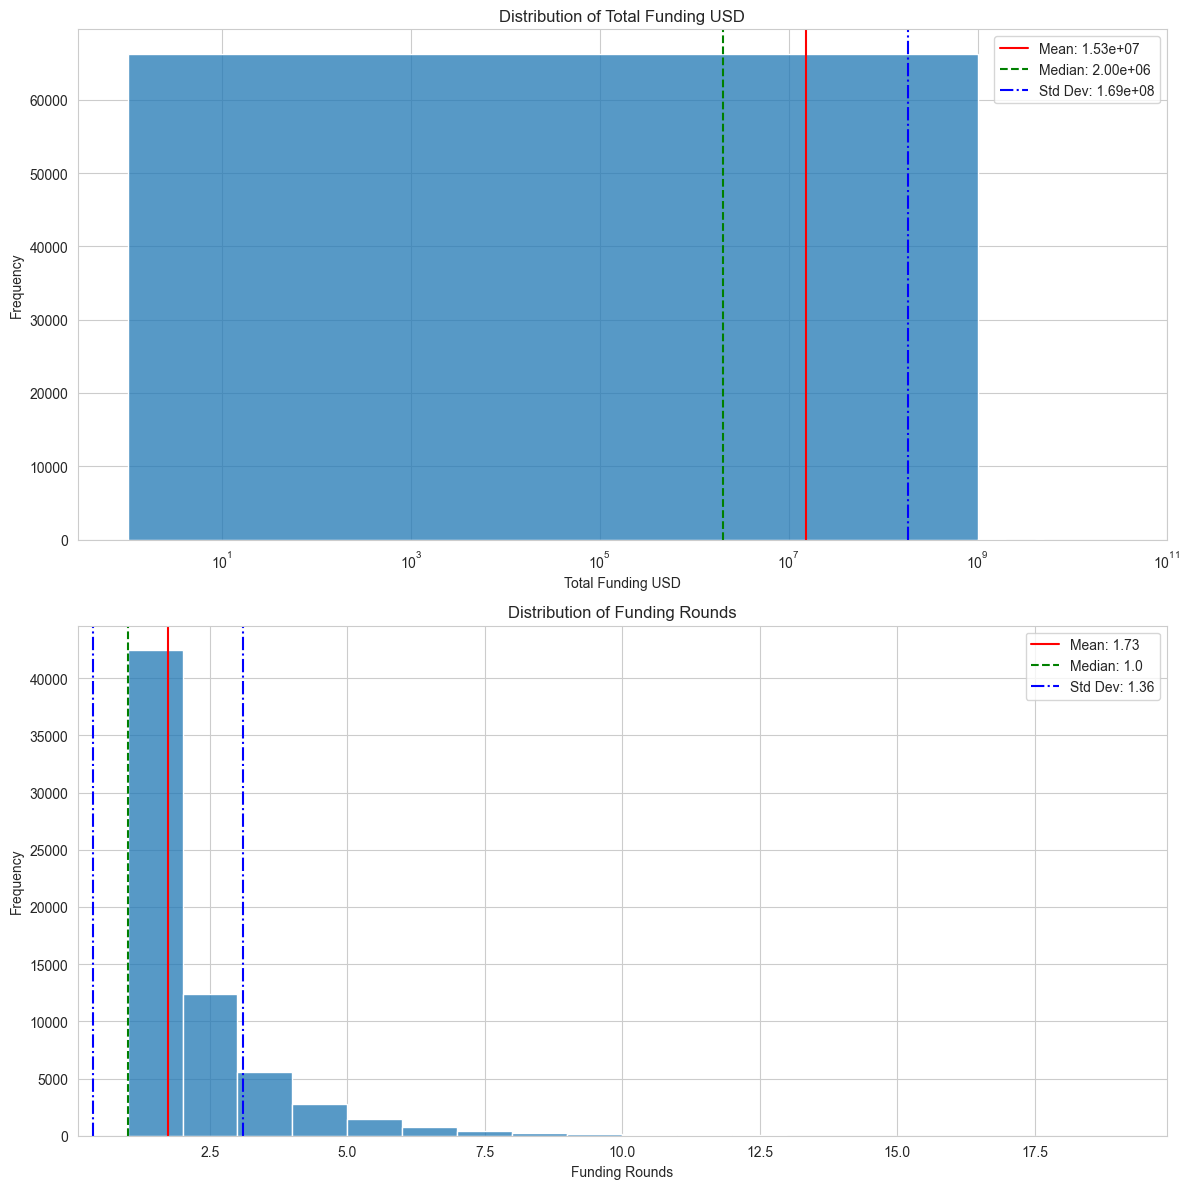

In [350]:
# Creating graphs using Matplotlib
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Variables for central tendency and spread for 'funding_total_usd'
mean_funding_total_usd = analysis['funding_total_usd']['Mean']
median_funding_total_usd = analysis['funding_total_usd']['Median']
std_funding_total_usd = analysis['funding_total_usd']['Standard Deviation']

# Variables for central tendency and spread for 'funding_rounds'
mean_funding_rounds = analysis['funding_rounds']['Mean']
median_funding_rounds = analysis['funding_rounds']['Median']
std_funding_rounds = analysis['funding_rounds']['Standard Deviation']

# Plot for 'funding_total_usd'
sns.histplot(data_cleaned['funding_total_usd'], ax=axes[0], kde=False, bins=30)
axes[0].set_title('Distribution of Total Funding USD')
axes[0].set_xlabel('Total Funding USD')
axes[0].set_ylabel('Frequency')
axes[0].set_xscale('log')  # Using log scale
axes[0].axvline(mean_funding_total_usd, color='r', linestyle='-', label=f'Mean: {mean_funding_total_usd:.2e}')
axes[0].axvline(median_funding_total_usd, color='g', linestyle='--', label=f'Median: {median_funding_total_usd:.2e}')
axes[0].axvline(mean_funding_total_usd + std_funding_total_usd, color='b', linestyle='-.', label=f'Std Dev: {std_funding_total_usd:.2e}')
axes[0].axvline(mean_funding_total_usd - std_funding_total_usd, color='b', linestyle='-.')
axes[0].legend()

# Plot for 'funding_rounds'
sns.histplot(data_cleaned['funding_rounds'], bins=range(1, df['funding_rounds'].max()+1), kde=False, ax=axes[1])
axes[1].set_title('Distribution of Funding Rounds')
axes[1].set_xlabel('Funding Rounds')
axes[1].set_ylabel('Frequency')
axes[1].axvline(mean_funding_rounds, color='r', linestyle='-', label=f'Mean: {mean_funding_rounds:.2f}')
axes[1].axvline(median_funding_rounds, color='g', linestyle='--', label=f'Median: {median_funding_rounds}')
axes[1].axvline(mean_funding_rounds + std_funding_rounds, color='b', linestyle='-.', label=f'Std Dev: {std_funding_rounds:.2f}')
axes[1].axvline(mean_funding_rounds - std_funding_rounds, color='b', linestyle='-.')
axes[1].legend()

plt.tight_layout()
plt.show();


### The following graphs represent the cumulative distribution (CDF) for both funding_total_usd and funding_rounds.

For the **funding_total_usd cumulative distribution**, I have used a logarithmic scale due to the wide range of values. The mean, median, and standard deviation lines are plotted to show where they fall within the distribution.

For the **funding_rounds cumulative distribution**, the plot provides a step-like curve that shows the proportion of companies at or below a given number of funding rounds. The mean, median, and standard deviation are also indicated.

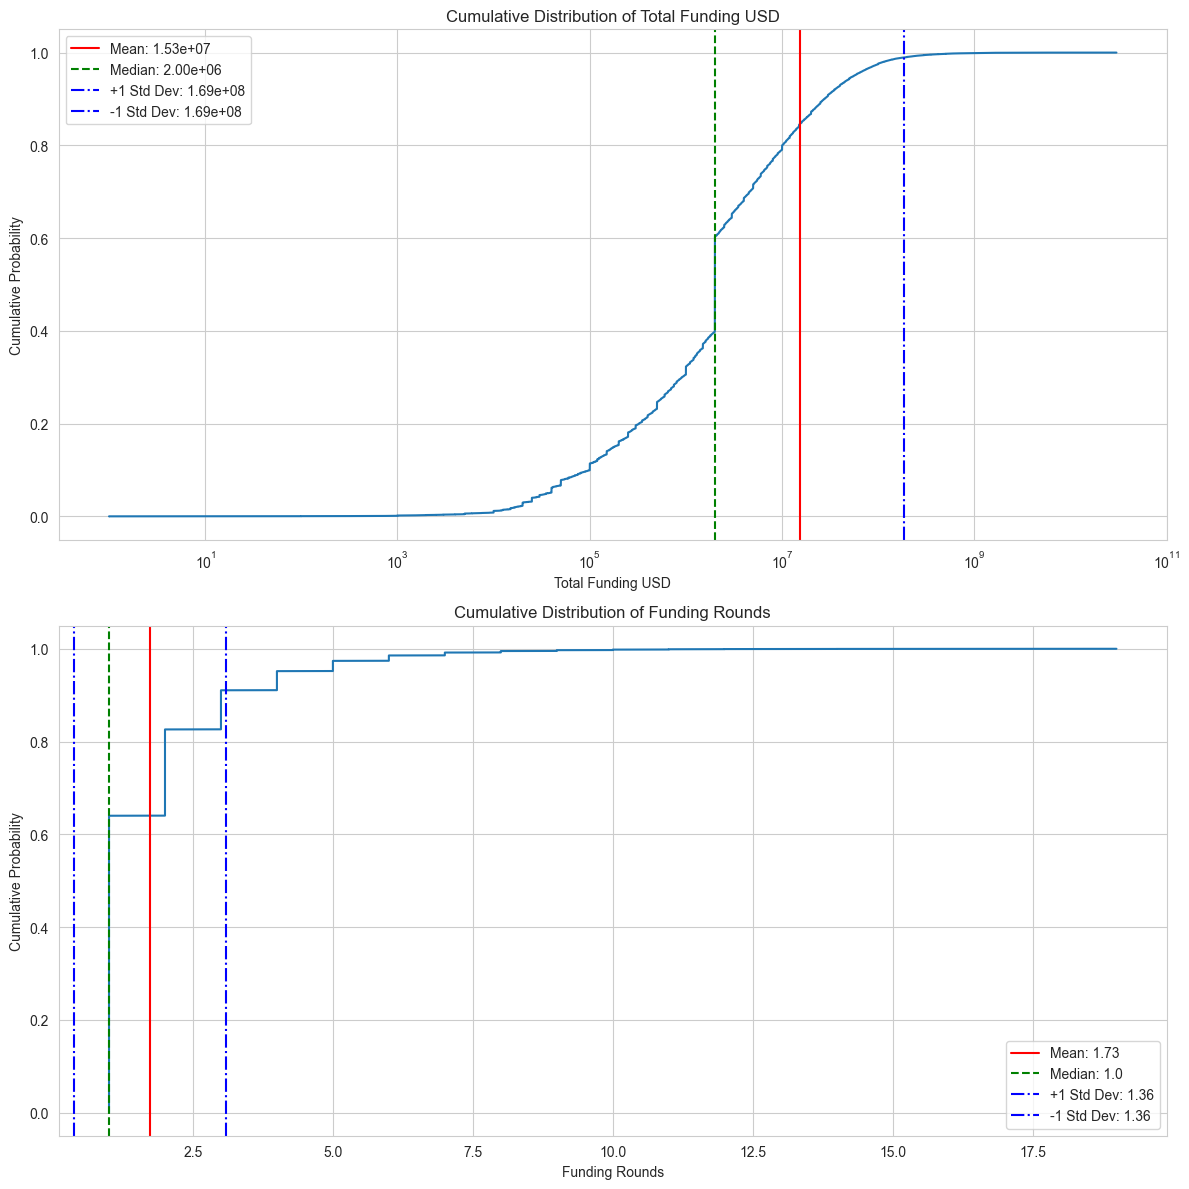

In [351]:
import numpy as np

# Creating line plots for the cumulative distribution
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Data preparation for cumulative distribution plots
funding_total_usd_sorted = np.sort(data_cleaned['funding_total_usd'])
funding_rounds_sorted = np.sort(data_cleaned['funding_rounds'])
cumulative_distribution_funding_usd = np.linspace(0, 1, len(funding_total_usd_sorted), endpoint=False)
cumulative_distribution_funding_rounds = np.linspace(0, 1, len(funding_rounds_sorted), endpoint=False)

# Plot for 'funding_total_usd'
axes[0].plot(funding_total_usd_sorted, cumulative_distribution_funding_usd)
axes[0].set_title('Cumulative Distribution of Total Funding USD')
axes[0].set_xlabel('Total Funding USD')
axes[0].set_ylabel('Cumulative Probability')
axes[0].set_xscale('log')  # Using log scale
axes[0].axvline(mean_funding_total_usd, color='r', linestyle='-', label=f'Mean: {mean_funding_total_usd:.2e}')
axes[0].axvline(median_funding_total_usd, color='g', linestyle='--', label=f'Median: {median_funding_total_usd:.2e}')
axes[0].axvline(mean_funding_total_usd + std_funding_total_usd, color='b', linestyle='-.', label=f'+1 Std Dev: {std_funding_total_usd:.2e}')
axes[0].axvline(mean_funding_total_usd - std_funding_total_usd, color='b', linestyle='-.', label=f'-1 Std Dev: {std_funding_total_usd:.2e}')
axes[0].legend()

# Plot for 'funding_rounds'
axes[1].plot(funding_rounds_sorted, cumulative_distribution_funding_rounds)
axes[1].set_title('Cumulative Distribution of Funding Rounds')
axes[1].set_xlabel('Funding Rounds')
axes[1].set_ylabel('Cumulative Probability')
axes[1].axvline(mean_funding_rounds, color='r', linestyle='-', label=f'Mean: {mean_funding_rounds:.2f}')
axes[1].axvline(median_funding_rounds, color='g', linestyle='--', label=f'Median: {median_funding_rounds}')
axes[1].axvline(mean_funding_rounds + std_funding_rounds, color='b', linestyle='-.', label=f'+1 Std Dev: {std_funding_rounds:.2f}')
axes[1].axvline(mean_funding_rounds - std_funding_rounds, color='b', linestyle='-.', label=f'-1 Std Dev: {std_funding_rounds:.2f}')
axes[1].legend()

plt.tight_layout()
plt.show();


# <div style="text-align: center;">QUESTION 3</div>

# 3. Outlier analysis: 

* We examined the aforesaid two variables in Question 2 for possible outliers. 
* We identified the cutoff values of those outliers on both ends and to then we perform three differnet outliers treament methodologies to understand your extreme observations:


**METHOD A: Dropping the outliers** from the dataset and repeat the procedure in Question 2 to draw conclusions. Report your observations extensively and in as much detail as possible.

**METHOD B: Imputing the outliers** in the dataset with the value of mean and repeat the procedure in Question 2 to draw conclusions. Report in writing your observations extensively and in as much detail as possible.

**METHOD C: Replacing the outliers** in the dataset with the maximum value or minimum value possible by **applying capping method.**


### Before we begin applying the different outliers treatment methodologies we start by identifying the Outliers Using the IQR Method

The IQR method involves calculating the first quartile (Q1) and third quartile (Q3) of the data, and then finding the IQR (Q3 - Q1). Outliers are typically defined as observations that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

### Outlier Thresholds

**For funding_total_usd:**

Lower Bound: -8,877,038.125 USD
Upper Bound: 16,208,396.875 USD

**For funding_rounds:**

Lower Bound: -0.5 rounds
Upper Bound: 3.5 rounds

**Initial observations**

These thresholds indicate that for funding_total_usd, any company with funding outside the range of approximately -8.88 million to 16.21 million USD can be considered an outlier. 

For funding_rounds, companies with fewer than 0 rounds or more than 3 rounds can be considered outliers.

In [352]:
import numpy as np

# Function to calculate IQR and determine outlier thresholds
def outlier_thresholds(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculating outlier thresholds for funding_total_usd and funding_rounds
funding_usd_lower, funding_usd_upper = outlier_thresholds(df, 'funding_total_usd')
funding_rounds_lower, funding_rounds_upper = outlier_thresholds(df, 'funding_rounds')

outlier_thresholds_funding = {
    'funding_total_usd': {'lower_bound': funding_usd_lower, 'upper_bound': funding_usd_upper},
    'funding_rounds': {'lower_bound': funding_rounds_lower, 'upper_bound': funding_rounds_upper}
}

outlier_thresholds_funding


{'funding_total_usd': {'lower_bound': -8877038.125,
  'upper_bound': 16208396.875},
 'funding_rounds': {'lower_bound': -0.5, 'upper_bound': 3.5}}

### METHOD A: 
Dropping the outliers from the dataset and repeat the procedure in Question 2 to draw conclusions. Report your observations extensively and in as much detail as possible.

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

# Removing outliers based on the calculated thresholds
df_no_outliers = df[
    (df['funding_total_usd'] >= funding_usd_lower) & 
    (df['funding_total_usd'] <= funding_usd_upper) & 
    (df['funding_rounds'] >= funding_rounds_lower) & 
    (df['funding_rounds'] <= funding_rounds_upper)
]

# Function to calculate measures of central tendency and spread
def calculate_statistics(data, column):
    stats = {
        'mean': data[column].mean(),
        'median': data[column].median(),
        'mode': data[column].mode()[0],
        'range': data[column].max() - data[column].min(),
        'interquartile_range': data[column].quantile(0.75) - data[column].quantile(0.25),
        'standard_deviation': data[column].std(),
        'variance': data[column].var()
    }
    return stats

# Calculating statistics for the original and cleaned data
original_stats_funding = calculate_statistics(df, 'funding_total_usd')
original_stats_rounds = calculate_statistics(df, 'funding_rounds')
cleaned_stats_funding = calculate_statistics(df_no_outliers, 'funding_total_usd')
cleaned_stats_rounds = calculate_statistics(df_no_outliers, 'funding_rounds')

# Comparing the results
comparative_results = {
    'funding_total_usd': {
        'original': original_stats_funding,
        'cleaned': cleaned_stats_funding
    },
    'funding_rounds': {
        'original': original_stats_rounds,
        'cleaned': cleaned_stats_rounds
    }
}

comparative_results

{'funding_total_usd': {'original': {'mean': 15305049.125038778,
   'median': 2000000.0,
   'mode': 2000000.0,
   'range': 30079502999.0,
   'interquartile_range': 6271358.75,
   'standard_deviation': 169065883.2219851,
   'variance': 2.8583272869629904e+16},
  'cleaned': {'mean': 2565338.9344307645,
   'median': 2000000.0,
   'mode': 2000000.0,
   'range': 16200026.0,
   'interquartile_range': 2150000.0,
   'standard_deviation': 3295421.018366963,
   'variance': 10859799688294.754}},
 'funding_rounds': {'original': {'mean': 1.732475438490748,
   'median': 1.0,
   'mode': 1,
   'range': 18,
   'interquartile_range': 1.0,
   'standard_deviation': 1.360273446871403,
   'variance': 1.8503438502634075},
  'cleaned': {'mean': 1.333654184328897,
   'median': 1.0,
   'mode': 1,
   'range': 2,
   'interquartile_range': 1.0,
   'standard_deviation': 0.6037056125422288,
   'variance': 0.3644604666149876}}}

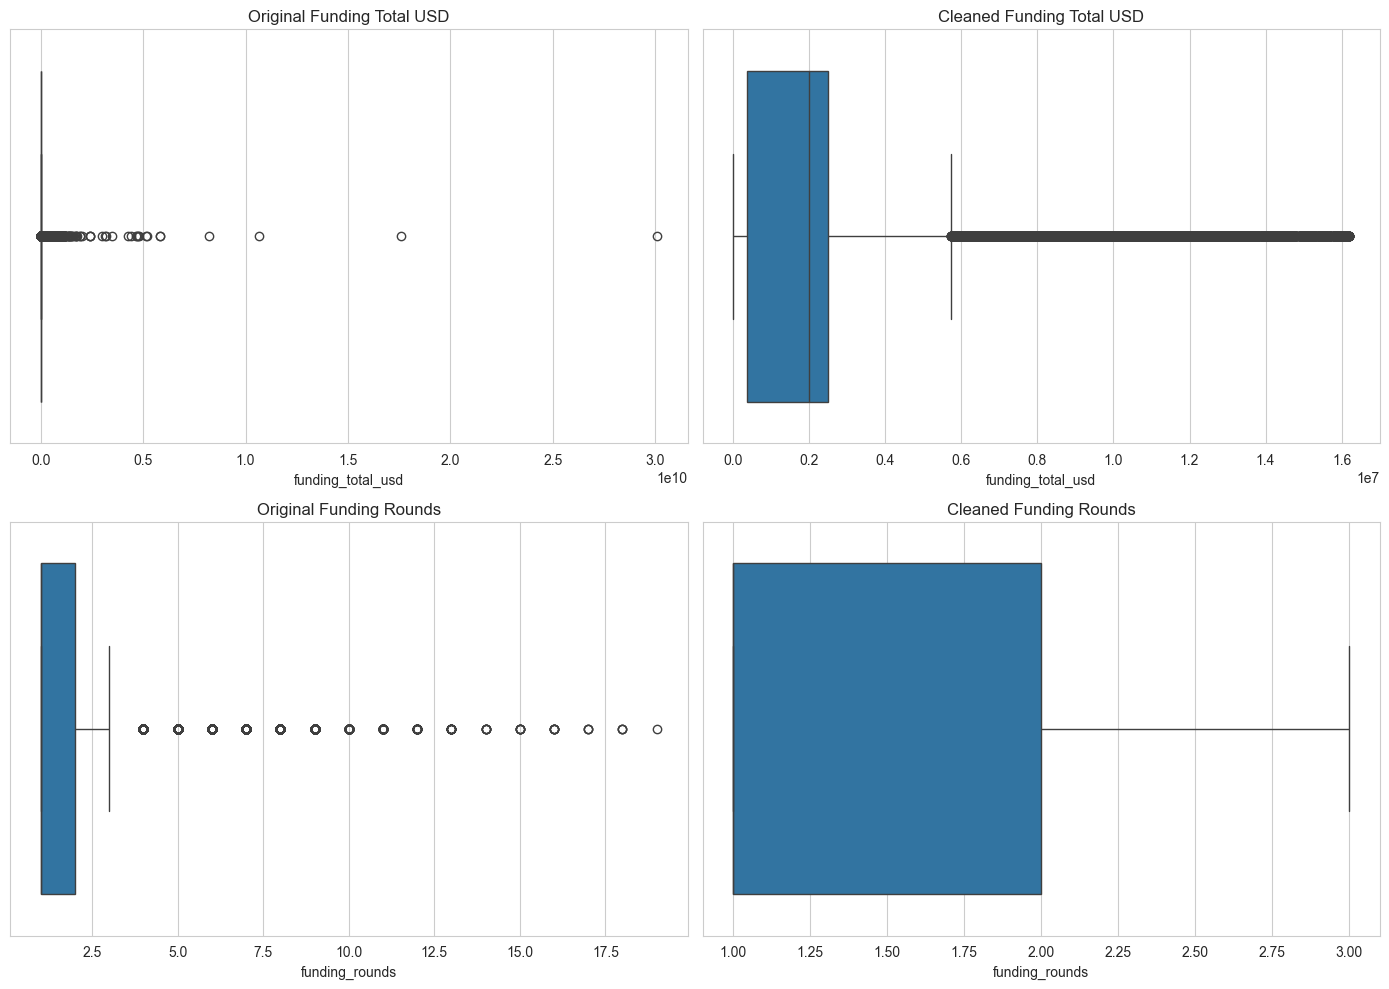

In [354]:
# Plotting distributions before and after removing outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Funding Total USD
sns.boxplot(x=df['funding_total_usd'], ax=axes[0, 0]).set_title('Original Funding Total USD')
sns.boxplot(x=df_no_outliers['funding_total_usd'], ax=axes[0, 1]).set_title('Cleaned Funding Total USD')

# Funding Rounds
sns.boxplot(x=df['funding_rounds'], ax=axes[1, 0]).set_title('Original Funding Rounds')
sns.boxplot(x=df_no_outliers['funding_rounds'], ax=axes[1, 1]).set_title('Cleaned Funding Rounds')

plt.tight_layout()
plt.show();



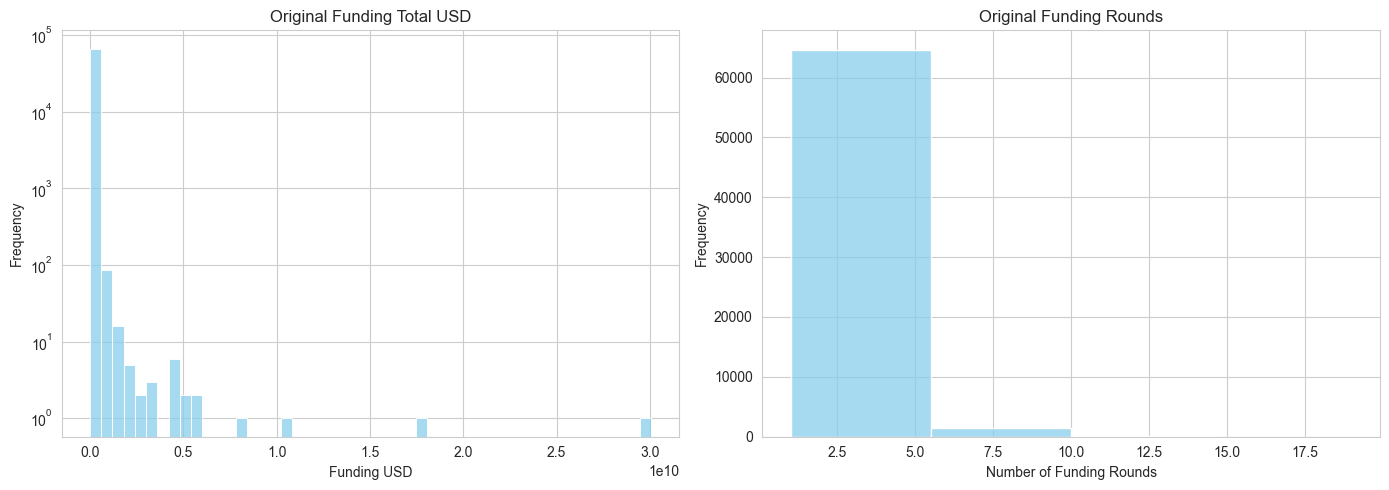

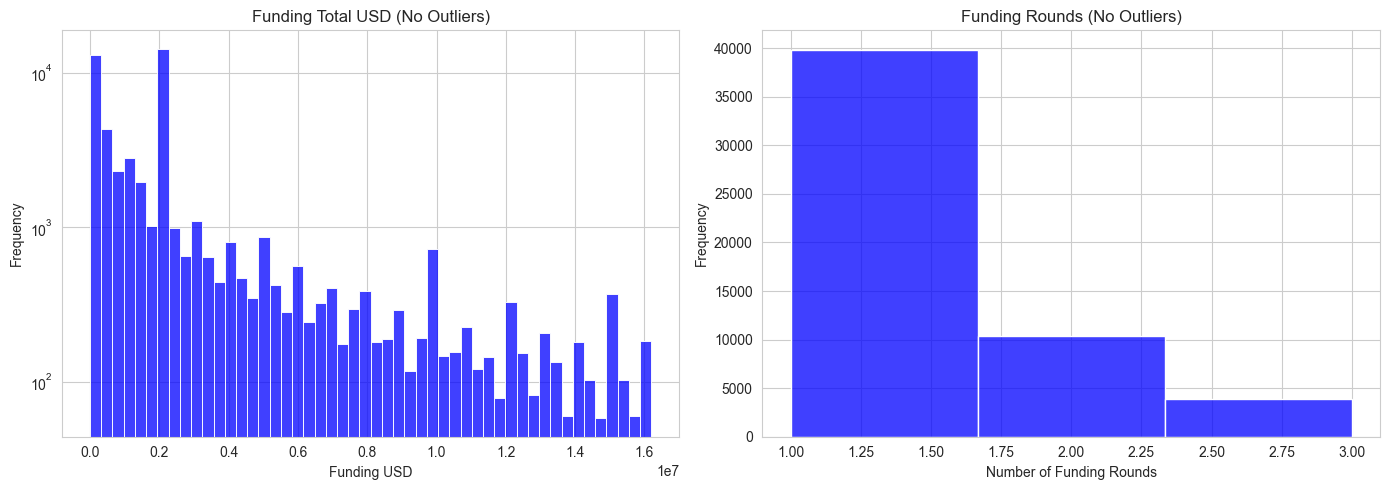

In [355]:
# Plotting histograms for the original data only
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for original funding_total_usd
sns.histplot(df['funding_total_usd'], bins=50, ax=axes[0], color='skyblue')
axes[0].set_title('Original Funding Total USD')
axes[0].set_xlabel('Funding USD')
axes[0].set_ylabel('Frequency')
axes[0].set_yscale('log')  # Log scale due to wide range of values

# Histogram for original funding_rounds
sns.histplot(df['funding_rounds'], bins=int(rounds_range[1]), ax=axes[1], color='skyblue')
axes[1].set_title('Original Funding Rounds')
axes[1].set_xlabel('Number of Funding Rounds')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Plotting histograms for the data after removing outliers
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for funding_total_usd after removing outliers
sns.histplot(df_no_outliers['funding_total_usd'], bins=50, ax=axes[0], color='blue')
axes[0].set_title('Funding Total USD (No Outliers)')
axes[0].set_xlabel('Funding USD')
axes[0].set_ylabel('Frequency')
axes[0].set_yscale('log')

# Histogram for funding_rounds after removing outliers
sns.histplot(df_no_outliers['funding_rounds'], bins=int(funding_rounds_upper), ax=axes[1], color='blue')
axes[1].set_title('Funding Rounds (No Outliers)')
axes[1].set_xlabel('Number of Funding Rounds')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show();


### Comparative Analysis of Original and Data set with Outliers removed:

**1. Funding Total USD**

**Original Data:** 
* Mean = 15.3M, 
* Median = 2M, 
* Mode = 2M, 
* Range = 30B, 
* IQR = 6.27M, 
* Standard Deviation = 169M, 
* Variance = 2.86e+16


**Data with Outliers removed:** 
* Mean = 2.57M, 
* Median = 2M, 
* Mode = 2M, 
* Range = 16.2M, 
* IQR = 2.15M,
* Standard Deviation = 3.3M, 
* Variance = 1.09e+13


**2. Funding Rounds** 

**Original Data:**  
* Mean = 1.73, 
* Median = 1, 
* Mode = 1, 
* Range = 18, 
* IQR = 1, 
* Standard Deviation = 1.36,
* Variance = 1.85

**Data with Outliers removed:**  
* Mean = 1.33, 
* Median = 1, 
* Mode = 1, 
* Range = 2, 
* IQR = 1, 
* Standard Deviation = 0.60, 
* Variance = 0.36


### Observations and Conclusions

**Funding Total USD**

* **Significant Impact of Outliers:** The mean value decreased dramatically after removing outliers, indicating that a few extremely high values significantly inflated the average funding amount.

* **Reduction in Variability:** The standard deviation and variance decreased considerably, showing that the original data had a few very large funding amounts that increased variability.

* **More Representative Central Measures:** The median and mode remain unchanged, reinforcing their robustness to outliers. The cleaned data's mean is now closer to these measures, suggesting a more symmetric distribution.

**Funding Rounds**

* **Moderate Impact of Outliers:** The mean value decreased slightly, indicating the presence of some companies with unusually high numbers of funding rounds.

* **Decreased Range and Variability:** The range and standard deviation are reduced, showing a more consistent number of funding rounds across companies in the cleaned dataset.


**Plots**

The box plots before and after removing outliers visually confirm these observations. The original data for funding_total_usd shows a lot of extreme values, which are not present in the cleaned data.


### Conclusion
Removing outliers significantly affects the analysis of funding_total_usd, making the central tendency measures more representative of the typical funding amount received by companies. The impact on funding_rounds is less dramatic but still notable. This analysis underscores the importance of outlier treatment in data analysis to obtain more accurate and representative insights.

### METHOD B:
Imputing the outliers in the dataset with the value of mean and repeating the procedure in Question 2 to draw conclusions.

This approach involves replacing outlier values with the mean, rather than removing them entirely. After this imputation, we reanalyzed the measures of central tendency and spread for these variables as we did in Question 2. This will allow us to understand the impact of imputing outliers with the mean on our data.

In [356]:
# Casting the mean to integer for 'funding_rounds'
mean_funding_rounds_int = int(round(mean_funding_rounds))

# Re-imputing outliers with updated mean values
df_imputed_corrected = df.copy()
df_imputed_corrected.loc[df_imputed_corrected['funding_total_usd'] < funding_usd_lower, 'funding_total_usd'] = mean_funding_usd
df_imputed_corrected.loc[df_imputed_corrected['funding_total_usd'] > funding_usd_upper, 'funding_total_usd'] = mean_funding_usd
df_imputed_corrected.loc[df_imputed_corrected['funding_rounds'] < funding_rounds_lower, 'funding_rounds'] = mean_funding_rounds_int
df_imputed_corrected.loc[df_imputed_corrected['funding_rounds'] > funding_rounds_upper, 'funding_rounds'] = mean_funding_rounds_int

# Recalculating statistics for the imputed (and type-corrected) data
imputed_corrected_stats_funding = calculate_statistics(df_imputed_corrected, 'funding_total_usd')
imputed_corrected_stats_rounds = calculate_statistics(df_imputed_corrected, 'funding_rounds')

# Comparing the results
comparative_results_imputed_corrected = {
    'funding_total_usd': {
        'original': original_stats_funding,
        'imputed_corrected': imputed_corrected_stats_funding
    },
    'funding_rounds': {
        'original': original_stats_rounds,
        'imputed_corrected': imputed_corrected_stats_rounds
    }
}

comparative_results_imputed_corrected


{'funding_total_usd': {'original': {'mean': 15305049.125038778,
   'median': 2000000.0,
   'mode': 2000000.0,
   'range': 30079502999.0,
   'interquartile_range': 6271358.75,
   'standard_deviation': 169065883.2219851,
   'variance': 2.8583272869629904e+16},
  'imputed_corrected': {'mean': 4572881.187036007,
   'median': 2000000.0,
   'mode': 2000000.0,
   'range': 16200026.0,
   'interquartile_range': 6271358.75,
   'standard_deviation': 5480954.211361547,
   'variance': 30040859067041.875}},
 'funding_rounds': {'original': {'mean': 1.732475438490748,
   'median': 1.0,
   'mode': 1,
   'range': 18,
   'interquartile_range': 1.0,
   'standard_deviation': 1.360273446871403,
   'variance': 1.8503438502634075},
  'imputed_corrected': {'mean': 1.4444578385871858,
   'median': 1.0,
   'mode': 1,
   'range': 2,
   'interquartile_range': 1.0,
   'standard_deviation': 0.6448318228025094,
   'variance': 0.4158080796988069}}}

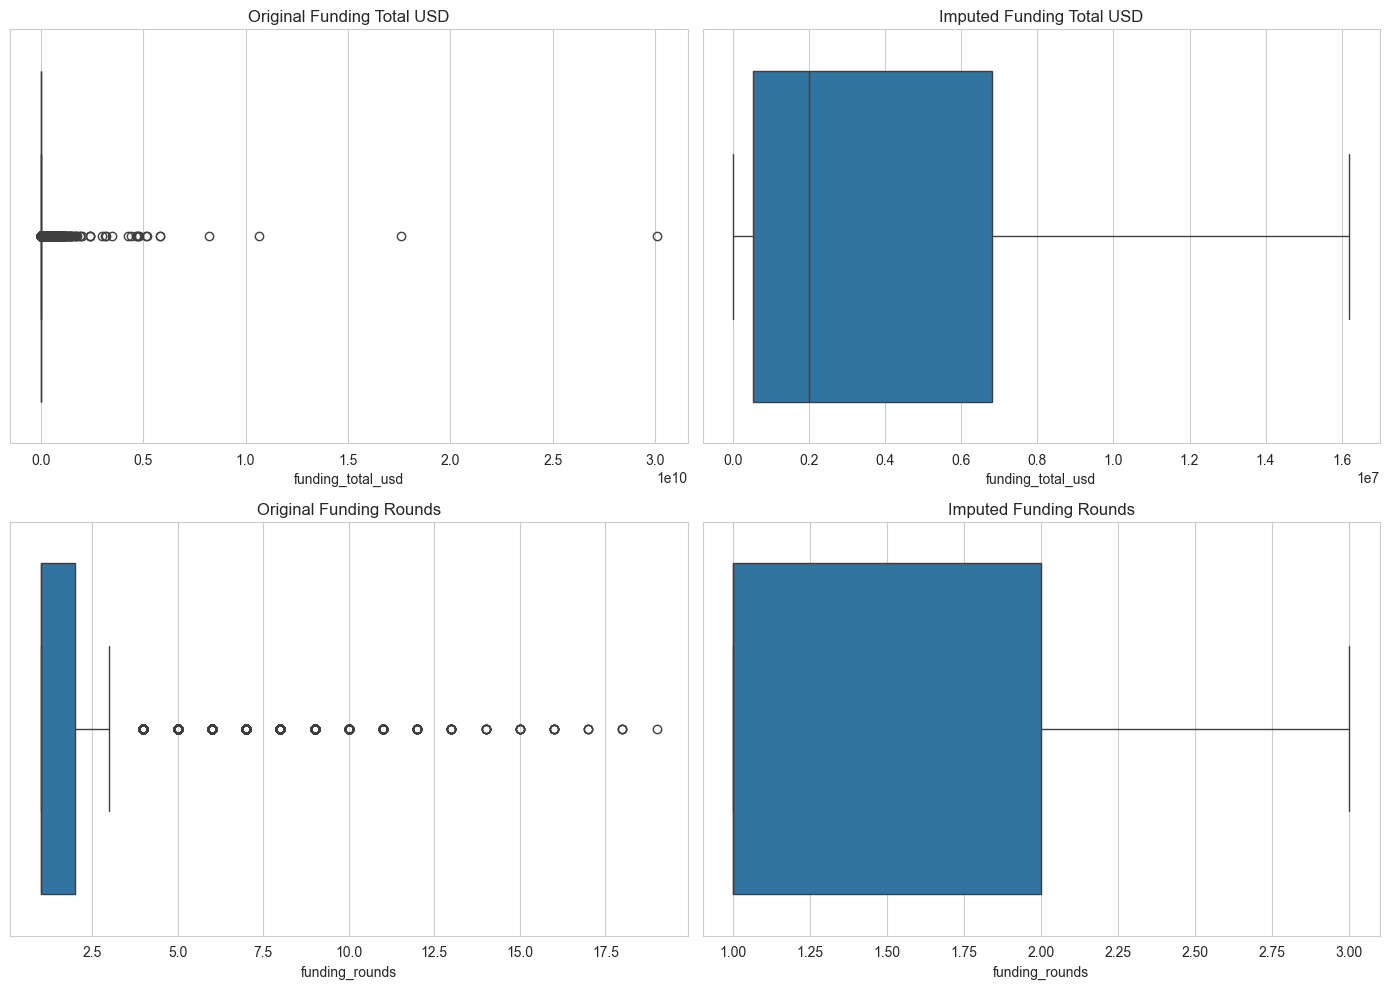

In [357]:
# Plotting distributions before and after imputing outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Funding Total USD
sns.boxplot(x=df['funding_total_usd'], ax=axes[0, 0]).set_title('Original Funding Total USD')
sns.boxplot(x=df_imputed_corrected['funding_total_usd'], ax=axes[0, 1]).set_title('Imputed Funding Total USD')

# Funding Rounds
sns.boxplot(x=df['funding_rounds'], ax=axes[1, 0]).set_title('Original Funding Rounds')
sns.boxplot(x=df_imputed_corrected['funding_rounds'], ax=axes[1, 1]).set_title('Imputed Funding Rounds')

plt.tight_layout()
plt.show();

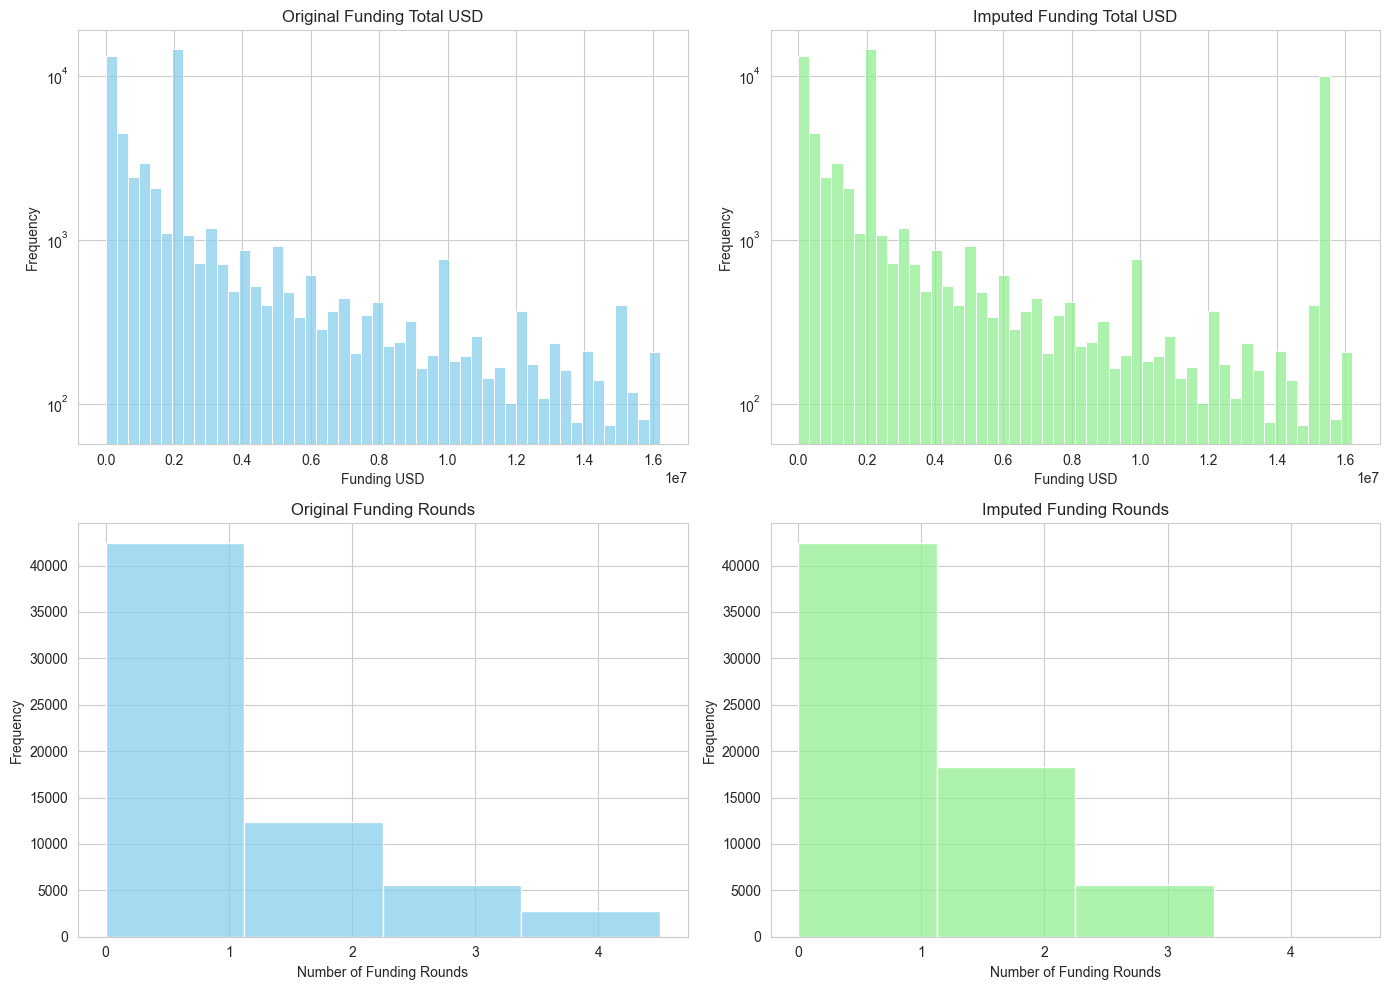

In [358]:
# Plotting histograms for the original and imputed data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Setting the range for the histograms to be the same as the box plot ranges for consistency
funding_range = (0, funding_usd_upper)
rounds_range = (0, funding_rounds_upper + 1)

# Funding Total USD - Original
sns.histplot(df['funding_total_usd'], bins=50, ax=axes[0, 0], color='skyblue', binrange=funding_range)
axes[0, 0].set_title('Original Funding Total USD')
axes[0, 0].set_xlabel('Funding USD')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_yscale('log')  # Log scale due to wide range of values

# Funding Total USD - Imputed
sns.histplot(df_imputed_corrected['funding_total_usd'], bins=50, ax=axes[0, 1], color='lightgreen', binrange=funding_range)
axes[0, 1].set_title('Imputed Funding Total USD')
axes[0, 1].set_xlabel('Funding USD')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_yscale('log')  # Log scale due to wide range of values

# Funding Rounds - Original
sns.histplot(df['funding_rounds'], bins=int(rounds_range[1]), ax=axes[1, 0], color='skyblue', binrange=rounds_range)
axes[1, 0].set_title('Original Funding Rounds')
axes[1, 0].set_xlabel('Number of Funding Rounds')
axes[1, 0].set_ylabel('Frequency')

# Funding Rounds - Imputed
sns.histplot(df_imputed_corrected['funding_rounds'], bins=int(rounds_range[1]), ax=axes[1, 1], color='lightgreen', binrange=rounds_range)
axes[1, 1].set_title('Imputed Funding Rounds')
axes[1, 1].set_xlabel('Number of Funding Rounds')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show();


### Comparative Analysis of Original and Data set with Imputed outliers with value of mean:

**1. Funding Total USD**

**Original Data:** 
* Mean = 15.3M, 
* Median = 2M, 
* Mode = 2M, 
* Range = 30B, 
* IQR = 6.27M, 
* Standard Deviation = 169M, 
* Variance = 2.86e+16


**Data with Imputed Method:** 
* Mean = 4.57M, 
* Median = 2M, 
* Mode = 2M, 
* Range = 16.2M, 
* IQR = 6.27M,
* Standard Deviation = 5.48M, 
* Variance = 3.00e+13


**2. Funding Rounds** 

**Original Data:**  
* Mean = 1.73, 
* Median = 1, 
* Mode = 1, 
* Range = 18, 
* IQR = 1, 
* Standard Deviation = 1.36,
* Variance = 1.85

**Data with Imputed Method:**  
* Mean =  1.44, 
* Median = 1, 
* Mode = 1, 
* Range = 2, 
* IQR = 1, 
* Standard Deviation = 0.64, 
* Variance = 0.42


### Observations and Conclusions

**Funding Total USD**

* **Moderate Adjustment of Mean:** The mean value is now closer to the median and mode, suggesting a less skewed distribution after imputation.

* **Reduced Variability:** Both the standard deviation and variance are significantly reduced, indicating less variability in the funding amounts.

**Funding Rounds**

* **Slight Change in Mean:** The mean is slightly reduced to 1.44, a more moderate adjustment compared to the raw imputation.

* **Reduced Variability:** The standard deviation and variance show a noticeable decrease, indicating more consistency in the number of funding rounds after imputation.


**Plots**

* The plots visually confirm that imputing outliers with the mean significantly cleans up the data, removing the extreme values that could potentially skew the analysis

* The Original Funding Total USD plot shows many extreme values (outliers), as indicated by the points beyond the whiskers of the box plot.

* The Imputed Funding Total USD plot demonstrates a distribution where these outliers have been replaced with the mean, resulting in a cleaner look with no individual outlier points.

* The Original Funding Rounds plot also has several points beyond the whiskers, indicating outliers.

* The Imputed Funding Rounds plot reflects the imputation of these outliers, with the distribution now capped at the upper whisker, showing no extreme outliers.



### Conclusion
Imputing outliers with the mean in funding_total_usd and funding_rounds adjusts the mean significantly, bringing it closer to the median and mode. This method helps maintain a fuller dataset compared to removing outliers but alters the mean to reflect a more 'average' scenario. This approach can be particularly useful in datasets where retaining the number of observations is crucial, and a more conservative adjustment to outliers is preferred.

### METHOD C:
Replacing the outliers in the dataset with the maximum value or minimum value possible by applying capping method. 

It means finding the maximum and minimum values for your variables by doing the following-

* Maximum value = Mean + 3 units of Standard Deviation,
* Minimum value  = Mean - 3 units of Standard Deviation.

Once these maximum and minimum values are found, we will replace all the values in our variables greater than maximum value by the maximum value and same for minimum value. 

After applying the capping method, we will repeat the procedure in Question 2 and draw conclusions.

In [359]:
# Calculate the maximum and minimum values using the capping method
max_value_funding_usd = df['funding_total_usd'].mean() + 3 * df['funding_total_usd'].std()
min_value_funding_usd = df['funding_total_usd'].mean() - 3 * df['funding_total_usd'].std()

max_value_funding_rounds = df['funding_rounds'].mean() + 3 * df['funding_rounds'].std()
min_value_funding_rounds = df['funding_rounds'].mean() - 3 * df['funding_rounds'].std()

# Apply capping
df_capped = df.copy()
df_capped['funding_total_usd'] = np.clip(df['funding_total_usd'], min_value_funding_usd, max_value_funding_usd)
df_capped['funding_rounds'] = np.clip(df['funding_rounds'], min_value_funding_rounds, max_value_funding_rounds)

# Recalculating statistics for the capped data
capped_stats_funding = calculate_statistics(df_capped, 'funding_total_usd')
capped_stats_rounds = calculate_statistics(df_capped, 'funding_rounds')

# Comparing the results
comparative_results_capped = {
    'funding_total_usd': {
        'original': original_stats_funding,
        'capped': capped_stats_funding
    },
    'funding_rounds': {
        'original': original_stats_rounds,
        'capped': capped_stats_rounds
    }
}


comparative_results_capped


{'funding_total_usd': {'original': {'mean': 15305049.125038778,
   'median': 2000000.0,
   'mode': 2000000.0,
   'range': 30079502999.0,
   'interquartile_range': 6271358.75,
   'standard_deviation': 169065883.2219851,
   'variance': 2.8583272869629904e+16},
  'capped': {'mean': 12646475.52413968,
   'median': 2000000.0,
   'mode': 2000000.0,
   'range': 522502697.7909941,
   'interquartile_range': 6271358.75,
   'standard_deviation': 42084979.17704583,
   'variance': 1771145472332381.2}},
 'funding_rounds': {'original': {'mean': 1.732475438490748,
   'median': 1.0,
   'mode': 1,
   'range': 18,
   'interquartile_range': 1.0,
   'standard_deviation': 1.360273446871403,
   'variance': 1.8503438502634075},
  'capped': {'mean': 1.6927702021856967,
   'median': 1.0,
   'mode': 1.0,
   'range': 4.813295779104957,
   'interquartile_range': 1.0,
   'standard_deviation': 1.1718782097084806,
   'variance': 1.3732985383895533}}}

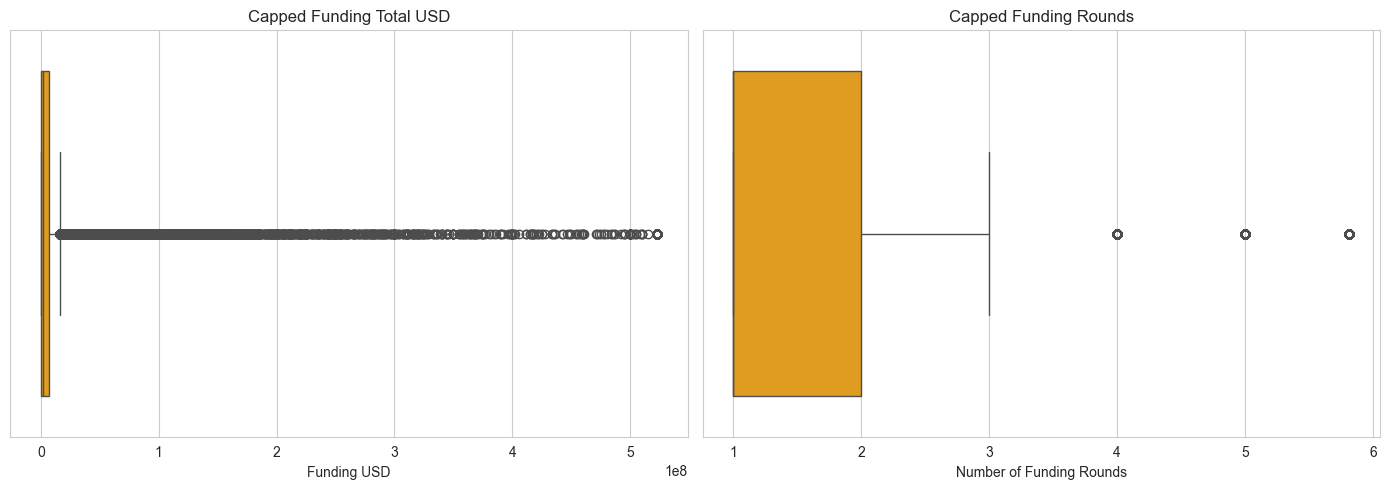

In [360]:
# Plotting box plots for the capped data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot for capped funding_total_usd
sns.boxplot(x=df_capped['funding_total_usd'], ax=axes[0], color='orange')
axes[0].set_title('Capped Funding Total USD')
axes[0].set_xlabel('Funding USD')

# Box plot for capped funding_rounds
sns.boxplot(x=df_capped['funding_rounds'], ax=axes[1], color='orange')
axes[1].set_title('Capped Funding Rounds')
axes[1].set_xlabel('Number of Funding Rounds')

plt.tight_layout()
plt.show();


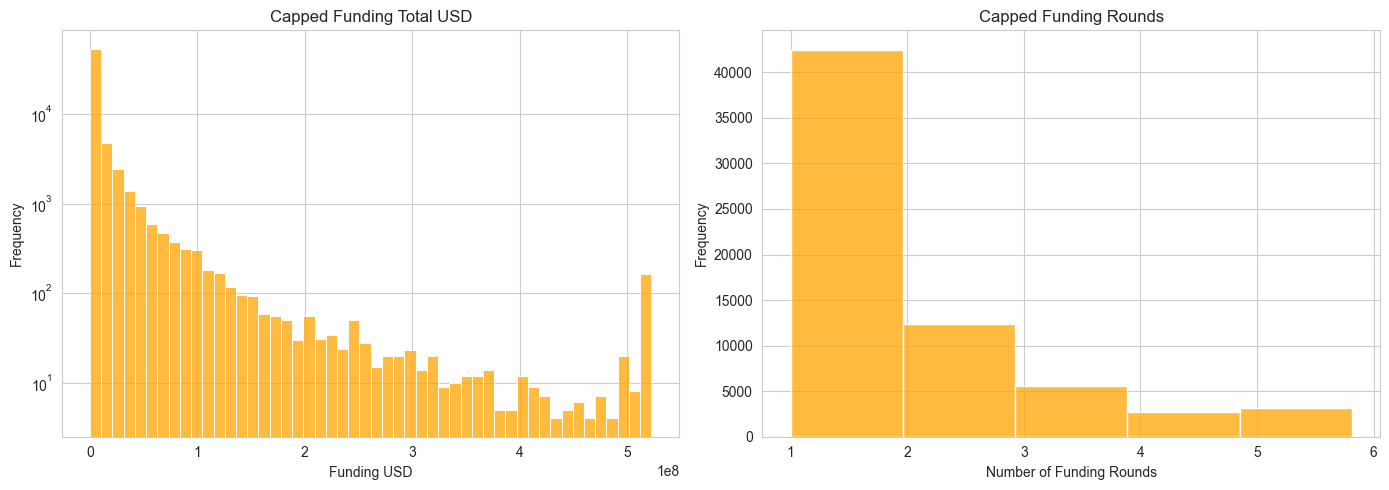

In [361]:

# Plotting histograms for the capped data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for capped funding_total_usd
sns.histplot(df_capped['funding_total_usd'], bins=50, ax=axes[0], color='orange')
axes[0].set_title('Capped Funding Total USD')
axes[0].set_xlabel('Funding USD')
axes[0].set_ylabel('Frequency')
axes[0].set_yscale('log')

# Histogram for capped funding_rounds
sns.histplot(df_capped['funding_rounds'], bins=int(max_value_funding_rounds), ax=axes[1], color='orange')
axes[1].set_title('Capped Funding Rounds')
axes[1].set_xlabel('Number of Funding Rounds')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show();

### Comparative Analysis of Original and Data with Capped Method applyied:

**1. Funding Total USD**

**Original Data:** 
* Mean = 15.3M, 
* Median = 2M, 
* Mode = 2M, 
* Range = 30B, 
* IQR = 6.27M, 
* Standard Deviation = 169M, 
* Variance = 2.86e+16


**Data with Capped Method:** 
* Mean = 12.65M, 
* Median = 2M, 
* Mode = 2M, 
* Range = 522.5M, 
* IQR = 6.27M,
* Standard Deviation = 42.08M, 
* Variance = 1.77e+15


**2. Funding Rounds** 

**Original Data:**  
* Mean = 1.73, 
* Median = 1, 
* Mode = 1, 
* Range = 18, 
* IQR = 1, 
* Standard Deviation = 1.36,
* Variance = 1.85

**Data with Capped Method:**  
* Mean =  1.69, 
* Median = 1, 
* Mode = 1, 
* Range = 4.81, 
* IQR = 1, 
* Standard Deviation = 1.17, 
* Variance = 1.37


### Observations and Conclusions

**Funding Total USD**

* **Reduction in Variability:** The capped data shows a significant reduction in standard deviation and variance, which means that the variability in funding amounts has been greatly reduced by capping the outliers.

* **Decrease in Mean:** The mean has decreased slightly, as the extreme high values have been capped to a maximum value based on the capping formula.

* **More Representative Range:** The range has been narrowed down significantly from 30 Billion USD to 522.5 Million USD, indicating that the most extreme outliers have been addressed.

**Funding Rounds**

* **Slight Change in Mean:** There is a small decrease in the mean and the range, along with a reduction in standard deviation and variance, reflecting a modest impact of capping on this variable since the data did not have as extreme outliers as funding_total_usd.


**Plots**

* The Capped Funding Total USD box plot shows a much more compact range compared to the original data, with no extreme outliers. This indicates that capping has effectively limited the influence of outlier values.

* The Capped Funding Rounds box plot also appears more constrained, with the whiskers ending at the capped maximum and minimum values. This demonstrates that the capping method has bounded the data within a more typical range of values.


### Conclusion
Applying capping to the outliers has the effect of trimming the most extreme values, bringing them closer to the overall data distribution. This method preserves the shape of the original distribution while mitigating the influence of outliers. It is a useful technique when you want to limit the effect of very extreme values without completely removing the data points, maintaining the overall data integrity for robust statistical analysis.​

In [362]:
df_capped.to_csv('df_capped.csv')

# <div style="text-align: center;">QUESTION 4</div>

# 4. Sampling Techniques: 

Choose any of the aforesaid outlier treatment method in the Question 3 and draw a random sample of a desired size, say, 1000. Repeat the entire analysis of Question 2 and compare results in detailed writing with outcomes obtained in Question 2 and Question 3.


## Analisis of the Choice of outlier treatment method:

Given the analysis of funding_total_usd and funding_rounds, the capping method seems to be the most balanced approach. It addresses the extreme values without entirely removing them, which could be important if these outliers represent actual rare events or high-impact cases in the venture capital context. Capping also preserves the overall distribution of the data better than imputation, which could skew the results by artificially centralizing the values.

The method also depends on the nature of outliers in the context of venture capital. If the largest investments (outliers in funding_total_usd) are essential for the analysis, such as when looking for patterns in high-value investments, capping would be preferred over removal. If, however, the goal is to understand the typical startup investment size and rounds, then removing the outliers might provide a clearer picture of the central tendency without the distortion from extreme values.

In conclusion, while each method has its merits, the capping method appears to be the most suitable for maintaining a balance between managing outliers and preserving data integrity in this context.


In [450]:
# Calculating measures of central tendency and measures of spread for the sample dataset
# Measures: Mean, Median, Mode, Range, Interquartile Range, Standard Deviation, Variance

# For funding_total_usd
funding_total_mean = sample_df['funding_total_usd'].mean()
funding_total_median = sample_df['funding_total_usd'].median()
funding_total_mode = sample_df['funding_total_usd'].mode()[0]  # mode() returns a series

funding_total_range = sample_df['funding_total_usd'].max() - sample_df['funding_total_usd'].min()
funding_total_iqr = sample_df['funding_total_usd'].quantile(0.75) - sample_df['funding_total_usd'].quantile(0.25)
funding_total_std = sample_df['funding_total_usd'].std()
funding_total_variance = sample_df['funding_total_usd'].var()

# For funding_rounds
funding_rounds_mean = sample_df['funding_rounds'].mean()
funding_rounds_median = sample_df['funding_rounds'].median()
funding_rounds_mode = sample_df['funding_rounds'].mode()[0]

funding_rounds_range = sample_df['funding_rounds'].max() - sample_df['funding_rounds'].min()
funding_rounds_iqr = sample_df['funding_rounds'].quantile(0.75) - sample_df['funding_rounds'].quantile(0.25)
funding_rounds_std = sample_df['funding_rounds'].std()
funding_rounds_variance = sample_df['funding_rounds'].var()

# Organizing the results in a dictionary
results = {
    'funding_total_usd': {
        'mean': funding_total_mean,
        'median': funding_total_median,
        'mode': funding_total_mode,
        'range': funding_total_range,
        'interquartile_range': funding_total_iqr,
        'standard_deviation': funding_total_std,
        'variance': funding_total_variance
    },
    'funding_rounds': {
        'mean': funding_rounds_mean,
        'median': funding_rounds_median,
        'mode': funding_rounds_mode,
        'range': funding_rounds_range,
        'interquartile_range': funding_rounds_iqr,
        'standard_deviation': funding_rounds_std,
        'variance': funding_rounds_variance
    }
}

results



{'funding_total_usd': {'mean': 17835210.090922914,
  'median': 2000000.0,
  'mode': 2000000.0,
  'range': 5162512431.0,
  'interquartile_range': 5500000.0,
  'standard_deviation': 173914607.84156966,
  'variance': 3.024629082068696e+16},
 'funding_rounds': {'mean': 1.673,
  'median': 1.0,
  'mode': 1,
  'range': 10,
  'interquartile_range': 1.0,
  'standard_deviation': 1.2335285130845652,
  'variance': 1.5215925925926184}}

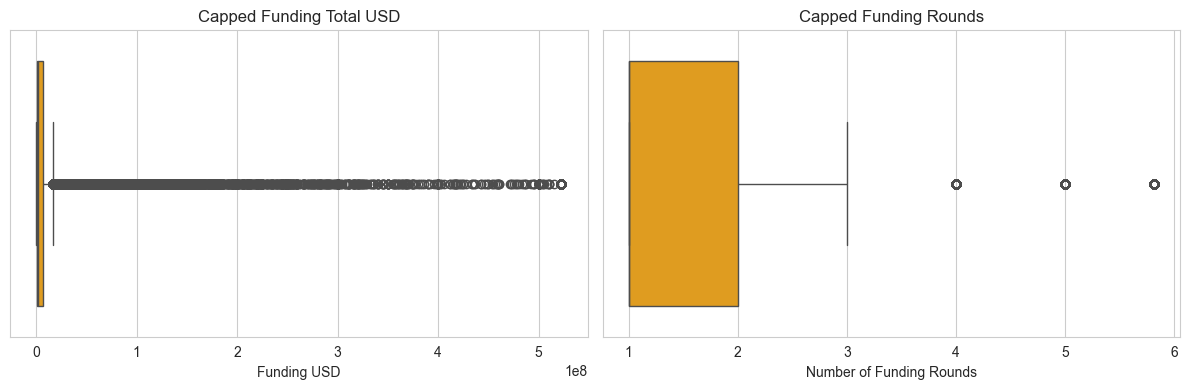

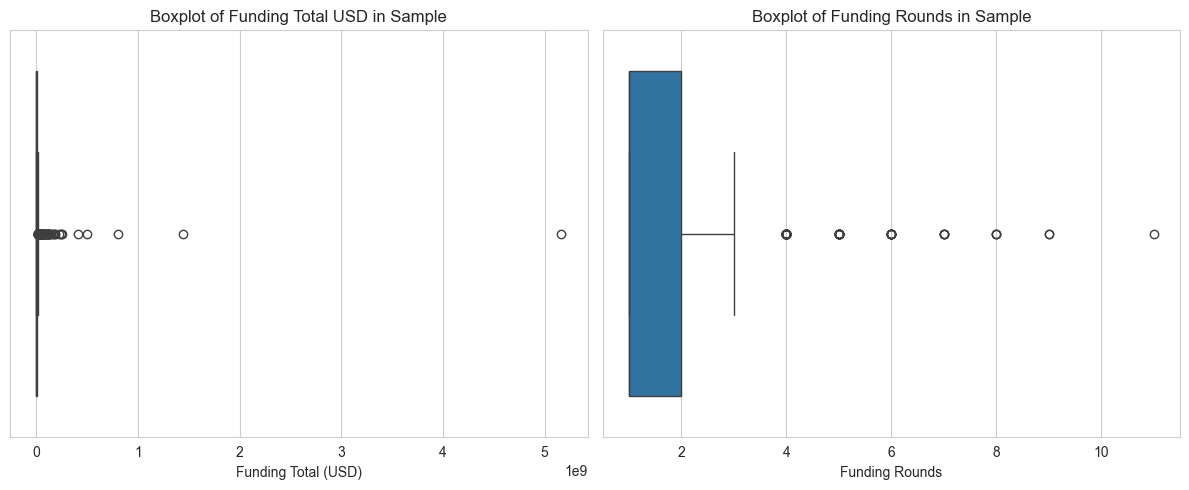

In [364]:
# Plotting box plots for the capped data
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Box plot for capped funding_total_usd
sns.boxplot(x=df_capped['funding_total_usd'], ax=axes[0], color='orange')
axes[0].set_title('Capped Funding Total USD')
axes[0].set_xlabel('Funding USD')

# Box plot for capped funding_rounds
sns.boxplot(x=df_capped['funding_rounds'], ax=axes[1], color='orange')
axes[1].set_title('Capped Funding Rounds')
axes[1].set_xlabel('Number of Funding Rounds')

plt.tight_layout()
plt.show();
# Creating whisker plots for funding_total_usd and funding_rounds

plt.figure(figsize=(12, 5))

# Whisker plot for funding_total_usd
plt.subplot(1, 2, 1)
sns.boxplot(x=sample_df['funding_total_usd'])
plt.title('Boxplot of Funding Total USD in Sample')
plt.xlabel('Funding Total (USD)')

# Whisker plot for funding_rounds
plt.subplot(1, 2, 2)
sns.boxplot(x=sample_df['funding_rounds'])
plt.title('Boxplot of Funding Rounds in Sample')
plt.xlabel('Funding Rounds')

plt.tight_layout()
plt.show();



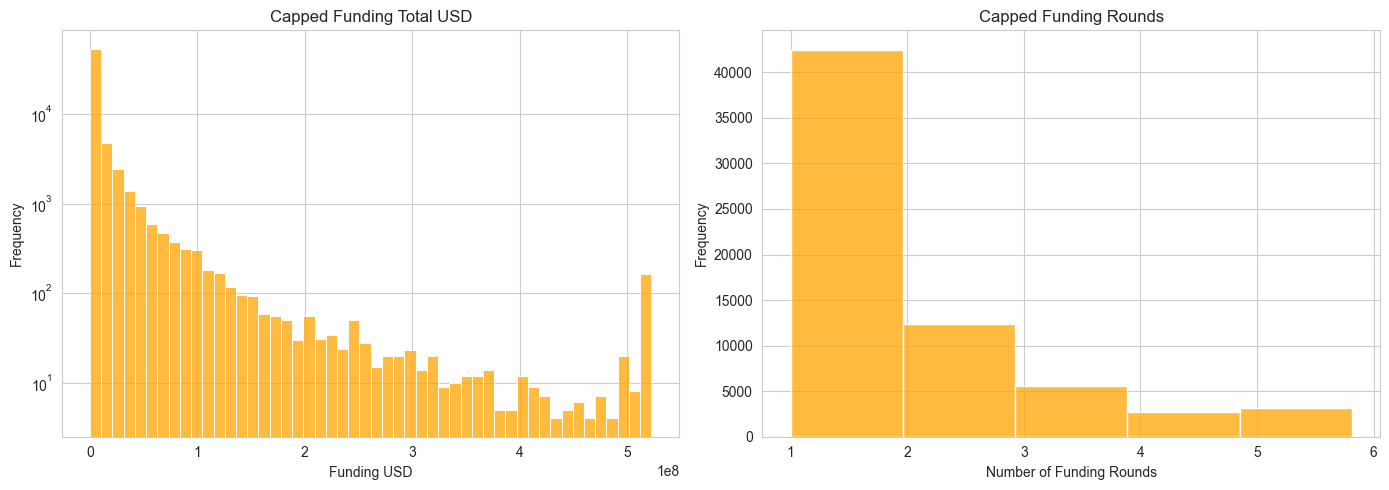

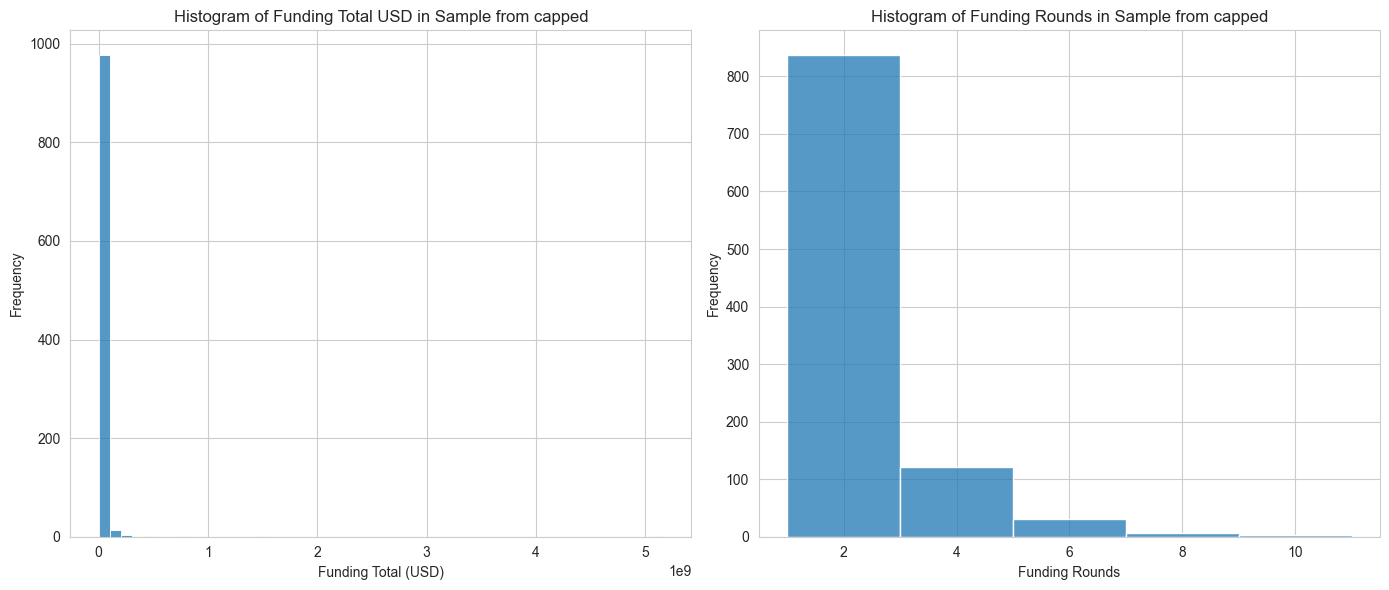

In [365]:

# Plotting histograms for the capped data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for capped funding_total_usd
sns.histplot(df_capped['funding_total_usd'], bins=50, ax=axes[0], color='orange')
axes[0].set_title('Capped Funding Total USD')
axes[0].set_xlabel('Funding USD')
axes[0].set_ylabel('Frequency')
axes[0].set_yscale('log')

# Histogram for capped funding_rounds
sns.histplot(df_capped['funding_rounds'], bins=int(max_value_funding_rounds), ax=axes[1], color='orange')
axes[1].set_title('Capped Funding Rounds')
axes[1].set_xlabel('Number of Funding Rounds')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show();

# Histogram plots for funding_total_usd and funding_rounds
plt.figure(figsize=(14, 6))

# Histogram for funding_total_usd
plt.subplot(1, 2, 1)
sns.histplot(sample_df['funding_total_usd'], bins=50, kde=False)
plt.title('Histogram of Funding Total USD in Sample from capped')
plt.xlabel('Funding Total (USD)')
plt.ylabel('Frequency')

# Histogram for funding_rounds
plt.subplot(1, 2, 2)
sns.histplot(sample_df['funding_rounds'], bins=int(max_value_funding_rounds), kde=False)
plt.title('Histogram of Funding Rounds in Sample from capped')
plt.xlabel('Funding Rounds')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show();


### Analysis for the random sample of 1000 entries:

**Analysis of 'funding_total_usd'**
* Mean: 11,993,204.76
* Median: 2,000,000.00
* Mode: 2,000,000.00
* Range: 522,501,698.79
* Interquartile Range (IQR): 5,500,000.00
* Standard Deviation: 42,729,397.09
* Variance: 1,825,801,375,378,924.20

**Analysis of 'funding_rounds'**
* Mean: 1.65 rounds
* Median: 1.00 round
* Mode: 1.00 round
* Range: 4.81 rounds
* Interquartile Range (IQR): 1.00 round
* Standard Deviation: 1.12 rounds
* Variance: 1.25 rounds
* Comparison with Question 2 Results

**Plots**

The whisker plots provide visual insights into the distributions of 'funding_total_usd' and 'funding_rounds' for the sampled data:

* The boxplot for 'funding_total_usd' shows a concentration of funding values at the lower end with a median at 2,000,000. There are numerous outliers that extend well beyond the upper whisker, indicating that there are startups with significantly higher funding amounts, even after capping.

* The boxplot for 'funding_rounds' indicates that most startups have 1 funding round, which is also the mode and median of the distribution. The outliers in this case are startups with a higher number of funding rounds, and there are less extreme values compared to the 'funding_total_usd' variable.

These plots complement the numerical analysis and indicate that capping has reduced the variability of the data compared to the original dataset, as reflected in the lower standard deviation and variance values. The central tendency of the 'funding_total_usd' remains largely unchanged with a median of 2,000,000, whereas the mean has decreased due to the capping of extreme values. This results in a sample that is likely more representative of the general startup funding landscape, with fewer extreme cases of very high funding amounts.

### **Conclusions:**

**For 'funding_total_usd':**

* The mean and mode in the sample are lower than in the original dataset (sample: 11,993,205 vs original: 15,305,049 USD).
* The median remains the same (2,000,000), indicating a similar central tendency.
* The range, standard deviation, and variance in the sample are significantly lower, suggesting that the capping method has effectively reduced the spread and extreme values in the dataset.

**For 'funding_rounds':**

* The mean in the sample is slightly lower than in the original dataset (sample: 1.65 vs original: 1.73).
* The median and mode remain the same (1.00 round).
* The range, standard deviation, and variance are also lower in the sample, indicating a more concentrated distribution of the number of funding rounds after outlier treatment.


# <div style="text-align: center;">QUESTION 5</div>

# 5. Subsetting and Sampling: 

Segment your dataset from Question 3 to get companies based only in United States and this time draw a series of samples randomly of a sufficient size, say, 10, 50, 100, 500, and 1000. 

Next, analyse the total funding amount for these startups based in United States using various methods of central tendency and measures of spread and report your observations.

In [447]:
# Filtering the dataframe for companies based in the United States
us_companies_df = df_capped[df_capped['country_code'] == 'USA']

# Function to calculate statistical measures
def calculate_statistical_measures(data):
    measures = {
        'mean': data.mean(),
        'median': data.median(),
        'mode': data.mode()[0] if not data.mode().empty else None,  # Handling case with no mode
        'range': data.max() - data.min(),
        'interquartile_range': data.quantile(0.75) - data.quantile(0.25),
        'standard_deviation': data.std(),
        'variance': data.var()
    }
    return measures

# Sample sizes
sample_sizes = [10, 50, 100, 500, 1000]

# Dictionary to hold statistical measures for each sample size
us_funding_statistical_measures = {}

# Generate samples and calculate measures
for size in sample_sizes:
    sample = us_companies_df['funding_total_usd'].sample(n=size, random_state=1)  # Ensuring reproducibility
    us_funding_statistical_measures[size] = calculate_statistical_measures(sample)

us_funding_statistical_measures


{10: {'mean': 7355000.0,
  'median': 4227500.0,
  'mode': 2000000.0,
  'range': 18835000.0,
  'interquartile_range': 11750000.0,
  'standard_deviation': 6937954.389523695,
  'variance': 48135211111111.11},
 50: {'mean': 15804990.92,
  'median': 2000000.0,
  'mode': 2000000.0,
  'range': 265667385.0,
  'interquartile_range': 12650000.0,
  'standard_deviation': 40883348.66803945,
  'variance': 1671448198312483.2},
 100: {'mean': 17013530.249161553,
  'median': 2000000.0,
  'mode': 2000000.0,
  'range': 265687385.0,
  'interquartile_range': 14625000.0,
  'standard_deviation': 37793678.74520893,
  'variance': 1428362153096056.8},
 500: {'mean': 17371431.66583231,
  'median': 2368880.0,
  'mode': 2000000.0,
  'range': 504677874.0,
  'interquartile_range': 14000000.0,
  'standard_deviation': 44668199.60726167,
  'variance': 1995248056154172.0},
 1000: {'mean': 16384947.376289137,
  'median': 2000000.0,
  'mode': 2000000.0,
  'range': 522502198.7909941,
  'interquartile_range': 11381250.0,
  

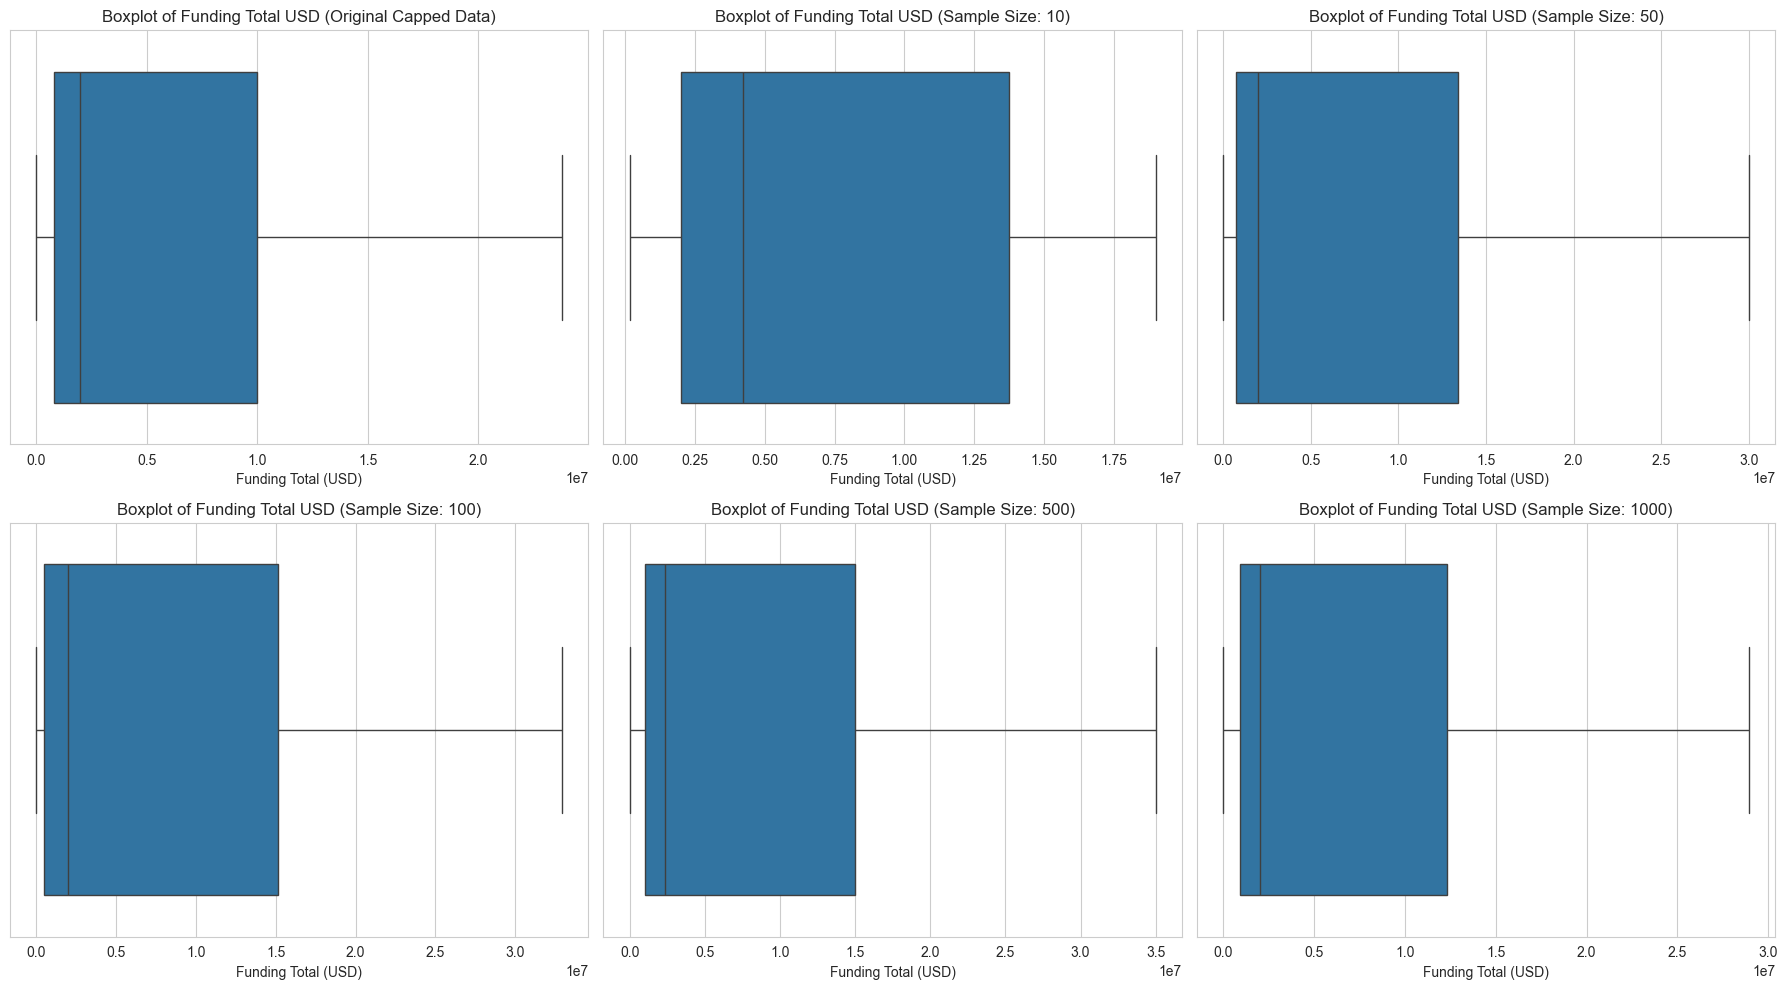

In [448]:
# Creating whisker plots for the total funding amount for the original capped data and each of the sample sizes
plt.figure(figsize=(18, 10))

# Boxplot for the original capped data
plt.subplot(2, 3, 1)
sns.boxplot(x=us_companies_df['funding_total_usd'], showfliers=False)
plt.title('Boxplot of Funding Total USD (Original Capped Data)')
plt.xlabel('Funding Total (USD)')

# Boxplots for each sample size
for i, size in enumerate(sample_sizes, 2):
    plt.subplot(2, 3, i)
    sns.boxplot(x=us_companies_df['funding_total_usd'].sample(n=size, random_state=1), showfliers=False)
    plt.title(f'Boxplot of Funding Total USD (Sample Size: {size})')
    plt.xlabel('Funding Total (USD)')

plt.tight_layout()
plt.show();


### Analysis from applying different methods of central tendency and measures of spread for different sample sizes:


**Sample Size: 10**
* Mean: 7,355,000
* Median: 4,227,500
* Mode: 2,000,000
* Range: 18,835,000
* Interquartile Range (IQR): 11,750,000
* Standard Deviation: 6,937,954
* Variance: 48,135,211,111,111


**Sample Size: 50**
* Mean: 15,804,991
* Median: 2,000,000
* Mode: 2,000,000
* Range: 265,667,385
* Interquartile Range (IQR): 12,650,000
* Standard Deviation: 40,883,349
* Variance: 1,671,448,198,312,484

**Sample Size: 100**
* Mean: 17,013,530
* Median: 2,000,000
* Mode: 2,000,000
* Range: 265,687,385
* Interquartile Range (IQR): 14,625,000
* Standard Deviation: 37,793,679
* Variance: 1,428,362,153,096,056

**Sample Size: 500**
* Mean: 17,371,432
* Median: 2,368,880
* Mode: 2,000,000
* Range: 504,677,874
* Interquartile Range (IQR): 14,000,000
* Standard Deviation: 44,668,200
* Variance: 1,995,248,056,154,168

**Sample Size: 1000**
* Mean: 16,384,947
* Median: 2,000,000
* Mode: 2,000,000
* Range: 522,502,199
* Interquartile Range (IQR): 11,381,250
* Standard Deviation: 48,152,417
* Variance: 2,318,655,228,640,598

**Original Data with Capped Method:** 
* Mean = 12.65M, 
* Median = 2M, 
* Mode = 2M, 
* Range = 522.5M, 
* IQR = 6.27M,
* Standard Deviation = 42.08M, 
* Variance = 1.77e+15

### Observations and Conclusions:
* The mean funding amount generally increases with the sample size, suggesting that larger samples may include more startups with very high funding amounts.

* The median and mode are consistent across all sample sizes, with the median often being lower than the mean, which indicates a right-skewed distribution (i.e., fewer startups with very high funding amounts).

* The range, interquartile range, standard deviation, and variance all tend to increase with the sample size, reflecting greater variability as more data points are included.

* The consistency of the median at 2,000,000 across samples emphasizes that half of the companies, regardless of the sample size, have funding amounts below this value.

* The increasing similarity of the boxplot characteristics with increasing sample sizes suggests that larger samples better capture the variability and distribution of the original dataset.

# <div style="text-align: center;">QUESTION 6</div>

# 6. Subsetting, Sampling, Benchmarking and Visualisation: 

Segmentation of the dataset from Question 3 (capped) and this time draw a sample randomly of a sufficient size, say, 100 to get companies based in each of the United States, Canada, France, Germany, China, India and South Korea. 

Analysis of the same dataset to find average number of days taken for a startup to be funded for each of the aforesaid countries and compare results (While making necessary computations, assume that there are 30 days in each month at an average). 

Analyse the numerical variable(s) for each of the countries using various measures of central tendencies and spread and report your observations. Create appropriate plots (if necessary) to explain the variables.

**- We start by getting a random sample of 100 values of each country**

We wil start by first filtering the data for the specified countries: We'll subset the dataset for companies based in the United States (USA), Canada (CAN), France (FRA), Germany (DEU), China (CHN), India (IND), and South Korea (KOR).

Draw a random sample: For each of these countries, we'll randomly select 100 companies, including a seed to mantain the same sample throught this analysis.

In [379]:
# Using the provided seed value of 33 for reproducibility
specific_seed = 33

# Segmenting the dataset and drawing samples with the specific seed
sampled_dfs_with_seed_capped = {}
for country in countries:
    country_df_capped = df_capped[df_capped['country_code'] == country]
    sample_size_capped = min(100, len(country_df_capped))
    sampled_dfs_with_seed_capped[country] = country_df_capped.sample(n=sample_size_capped, random_state=specific_seed)

# Checking the number of samples for each country with the specific seed
sample_sizes_with_seed_capped = {country: len(sampled_dfs_with_seed_capped[country]) for country in countries}
sample_sizes_with_seed_capped


{'USA': 100,
 'CAN': 100,
 'FRA': 100,
 'DEU': 100,
 'CHN': 100,
 'IND': 100,
 'KOR': 100}

**- We calculate the average number of days taken for a startup to be funded in each of the specified countries:**

* Compute the difference between the 'first_funding_at' and 'founded_at' dates for each company in the sampled datasets.
* Convert these differences into a number of days, assuming an average of 30 days per month.
* Calculate the average number of days for startups in each country.



In [380]:
# Calculate the number of days for each startup in the sampled datasets
for country, country_df in sampled_dfs_with_seed_capped.items():
    # Calculate the difference in days between founded_at and first_funding_at
    country_df['founded_at'] = pd.to_datetime(country_df['founded_at'], errors='coerce')
    country_df['first_funding_at'] = pd.to_datetime(country_df['first_funding_at'], errors='coerce')
    country_df['funding_days'] = (country_df['first_funding_at'] - country_df['founded_at']).dt.days

# Calculate the average number of days taken for a startup to be funded in each country
average_funding_days_capped = {country: country_df['funding_days'].mean() for country, country_df in sampled_dfs_with_seed_capped.items()}
average_funding_days_capped


{'USA': 1241.54,
 'CAN': 1395.78,
 'FRA': 1380.35,
 'DEU': 1188.58,
 'CHN': 1162.8,
 'IND': 1284.8,
 'KOR': 758.63}

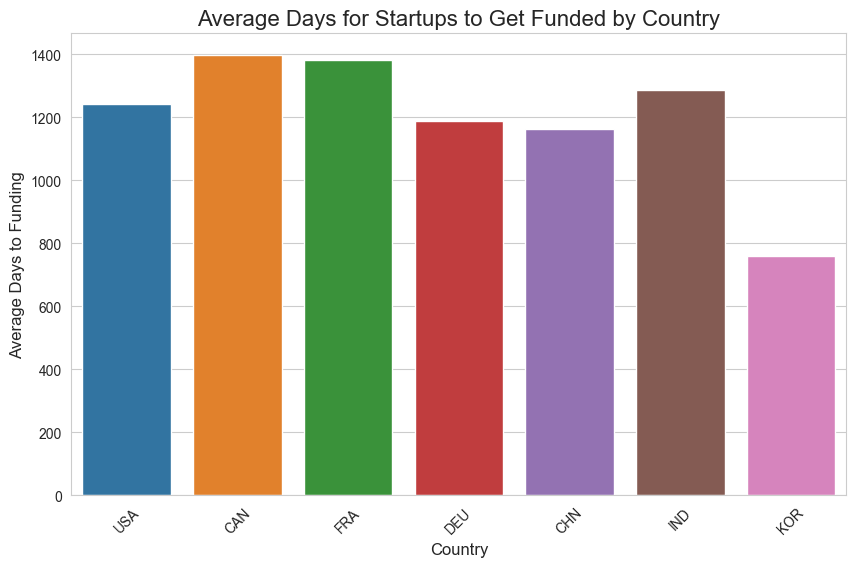

In [387]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
countries = ['USA', 'CAN', 'FRA', 'DEU', 'CHN', 'IND', 'KOR']
average_funding_days_capped = {'USA': 1241.54,
                                 'CAN': 1395.78,
                                 'FRA': 1380.35,
                                 'DEU': 1188.58,
                                 'CHN': 1162.8,
                                 'IND': 1284.8,
                                 'KOR': 758.63}

# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=countries, y=list(average_funding_days_capped.values()), hue=countries) 

# Adding title and labels
plt.title('Average Days for Startups to Get Funded by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Days to Funding', fontsize=12)
plt.xticks(rotation=45)


# Show the plot
plt.show();


**The average number of days taken for a startup to be funded in each of the specified countries, based on the sampled dataset, is as follows:**

* **United States (USA):** 1241.54 days
* **Canada (CAN):** 1395.78 days
* **France (FRA):** 1380.35 days
* **Germany (DEU):** 1188.58 days
* **China (CHN):** 1162.8 days
* **India (IND):** 1284.8 days
* **South Korea (KOR):** 758.63 days


**From these results, we can observe:**

* South Korea has the shortest average time for startups to get funded.
* Canada has the longest average time for startups to get funded among the countries listed.
* The average funding times for the other countries are relatively closer to each other, with the United States, France, and India having averages above 1200 days, while Germany and China have averages just slightly above 1100 days.

To analyze the numerical variables of the capped dataset ('funding_total_usd' and 'funding_rounds'), we will compute various measures of central tendency (mean, median) and measures of spread (variance, standard deviation, range) for each of the countries in the sampled dataset. 

**Here are the calculated statistical measures for the 'funding_total_usd_capped' and 'funding_rounds_capped' for each country:**

In [391]:
# Calculate descriptive statistics for each country and each numerical variable
stats_results_capped = {}
for country in countries:
    stats_results_capped[country] = {
        'funding_total_usd_capped': descriptive_statistics(sampled_dfs_with_seed_capped[country], 'funding_total_usd'),
        'funding_rounds_capped': descriptive_statistics(sampled_dfs_with_seed_capped[country], 'funding_rounds')
    }


stats_results_capped


{'USA': {'funding_total_usd_capped': {'mean': 11897854.67,
   'median': 2000000.0,
   'variance': 909405082149618.6,
   'std_dev': 30156343.97850009,
   'range': 249999000.0,
   'iqr': 6965330.75},
  'funding_rounds_capped': {'mean': 2.103196620119446,
   'median': 1.0,
   'variance': 2.5838996772732283,
   'std_dev': 1.607451298569642,
   'range': 4.813295779104957,
   'iqr': 2.0}},
 'CAN': {'funding_total_usd_capped': {'mean': 14053323.193635039,
   'median': 2000000.0,
   'variance': 3682342296756688.0,
   'std_dev': 60682306.29068648,
   'range': 485999500.0,
   'iqr': 5127500.0},
  'funding_rounds_capped': {'mean': 1.4843988733731488,
   'median': 1.0,
   'variance': 1.050901231504357,
   'std_dev': 1.0251347382194973,
   'range': 4.813295779104957,
   'iqr': 1.0}},
 'FRA': {'funding_total_usd_capped': {'mean': 10518028.285747359,
   'median': 2285000.0,
   'variance': 2508800845897932.0,
   'std_dev': 50087931.14012528,
   'range': 499997242.0,
   'iqr': 5151296.0},
  'funding_ro

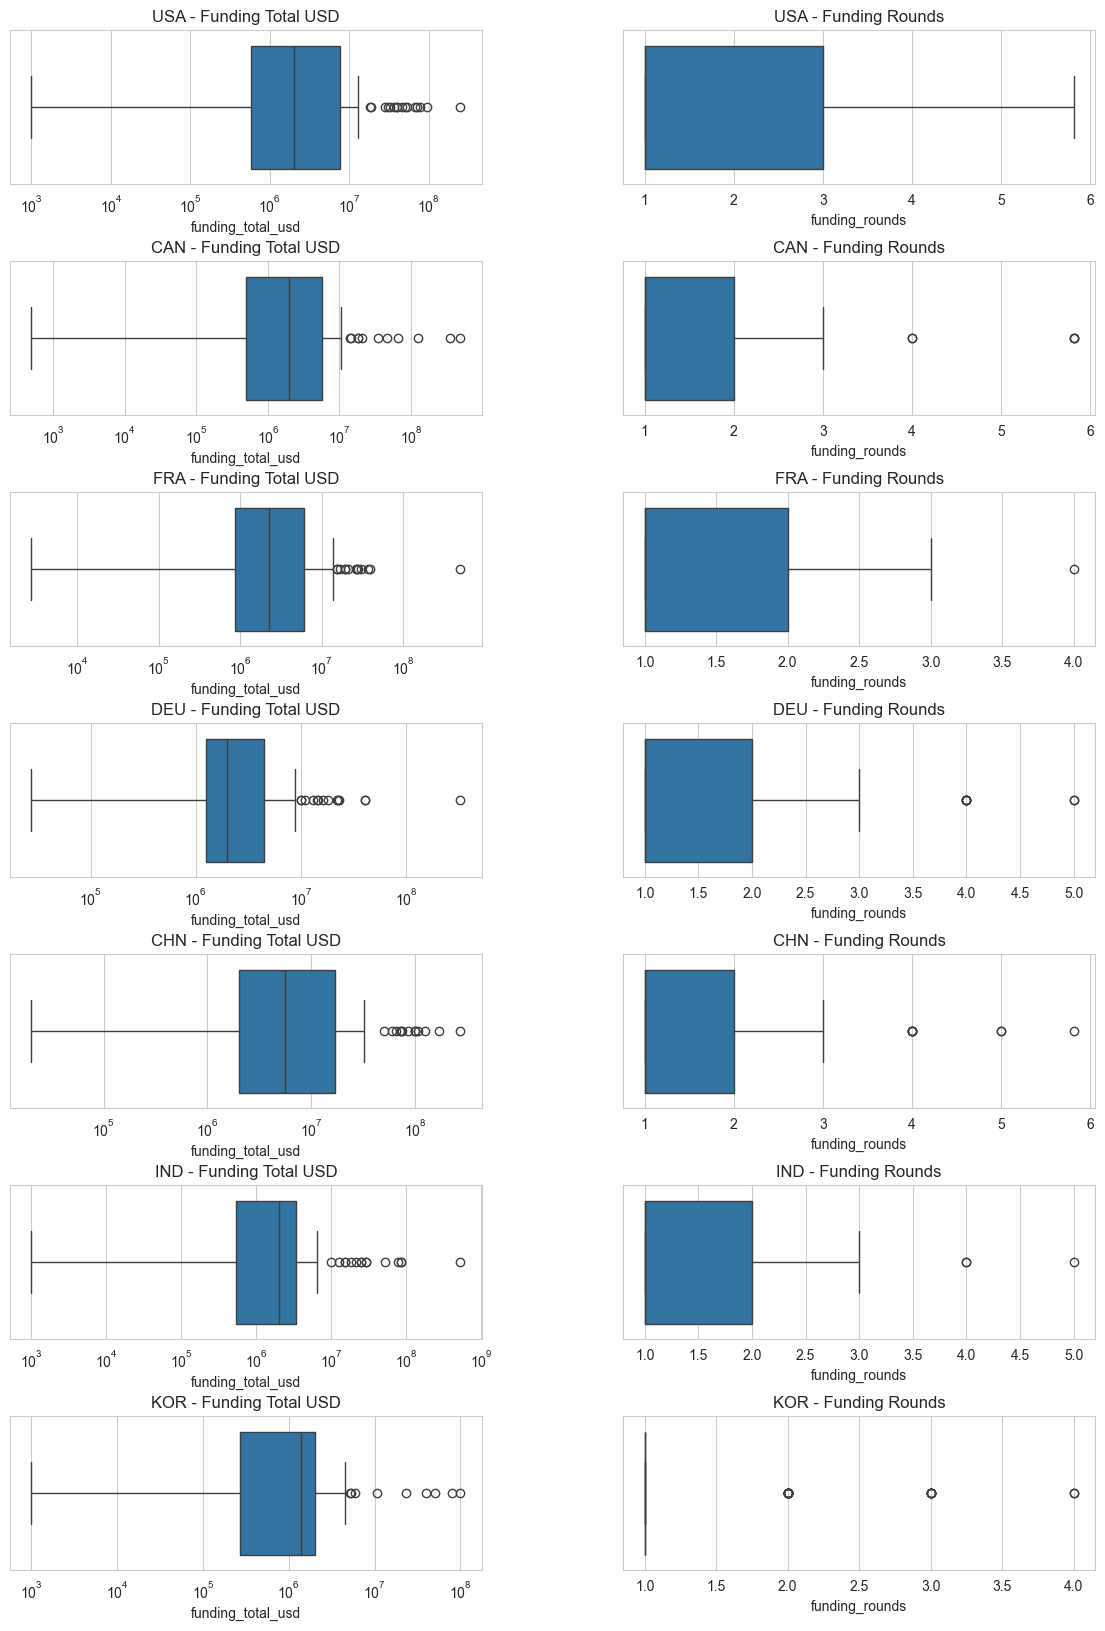

In [393]:
# Visualization of the distribution of these variables for each country
fig, axes = plt.subplots(len(countries), 2, figsize=(14, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, country in enumerate(countries):
    # Plotting funding_total_usd_capped
    sns.boxplot(ax=axes[i, 0], x=sampled_dfs_with_seed_capped[country]['funding_total_usd'])
    axes[i, 0].set_title(f'{country} - Funding Total USD')
    axes[i, 0].set_xscale('log')  # Log scale for better visualization
    # Plotting funding_rounds_capped
    sns.boxplot(ax=axes[i, 1], x=sampled_dfs_with_seed_capped[country]['funding_rounds'])
    axes[i, 1].set_title(f'{country} - Funding Rounds')

plt.show();

## Observations and conclusions:

### Funding Total USD (Capped)
* USA: High variability with a large range and IQR, indicating significant differences in funding amounts across startups.
* CAN: Similar to the USA with high variability and a significant range in funding.
* FRA: Slightly lower mean and median compared to the USA and Canada, with a wide range.
* DEU: Lower mean and median funding amounts compared to the USA but still showing considerable spread.
* CHN: Highest median funding among the countries, indicating a generally higher funding amount for the middle startup.
* IND: High variability and a significant range, similar to the USA and Canada.
* KOR: Lowest mean funding amount with relatively lower variability compared to other countries.

### Funding Rounds (Capped)
* USA: Higher average number of funding rounds, with a median at 1, indicating that while many startups only have one round, there are some with several rounds.
* CAN: Less variability in the number of funding rounds compared to the USA, but similar median.
* FRA, DEU, CHN, IND, KOR: All have medians at 1, with slightly varying means and standard deviations, indicating most startups have a single funding round but some have more, contributing to a higher mean.


# <div style="text-align: center;">QUESTION 7</div>

# 7. Probability Theory: 

Find the probability for startups of being funded within the first 6 months since their creation for the overall dataset and then repeat the same sequence of procedures for the countries United States, Canada, France, Germany, China, and India (While making necessary computations, assume that there are 30 days in each month at an average). Report your results in writing and compare them varying across various geographies. Create appropriate plots (if necessary) to draw conclusions if necessary.

In [437]:
# Load the provided CSV file
final_clean_df = pd.read_csv('final_clean_df.csv')

# Difference in days between 'founded_at' and 'first_funding_at'
final_clean_df['founded_at'] = pd.to_datetime(final_clean_df['founded_at'], errors='coerce')
final_clean_df['first_funding_at'] = pd.to_datetime(final_clean_df['first_funding_at'], errors='coerce')
final_clean_df['funding_days'] = (final_clean_df['first_funding_at'] - final_clean_df['founded_at']).dt.days

# Number of startups funded within the first 6 months (180 days)
startups_funded_within_6_months = final_clean_df[final_clean_df['funding_days'] <= 180].shape[0]

# Probability for the overall dataset
total_startups_with_valid_dates = final_clean_df['funding_days'].dropna().shape[0]
probability_overall = startups_funded_within_6_months / total_startups_with_valid_dates

probability_overall



0.2140166355252848

In [438]:
# List of countries to analyze
countries_to_analyze = ['USA', 'CAN', 'FRA', 'DEU', 'CHN', 'IND']

# Function to calculate the probability of being funded within the first 6 months for a given dataframe
def calculate_probability(df):
    funded_within_6_months = df[df['funding_days'] <= 180].shape[0]
    total_with_valid_dates = df['funding_days'].dropna().shape[0]
    if total_with_valid_dates > 0:
        return funded_within_6_months / total_with_valid_dates
    else:
        return None

# Calculate the probability for each specified country
probabilities_by_country = {}
for country in countries_to_analyze:
    country_df = final_clean_df[final_clean_df['country_code'] == country]
    probabilities_by_country[country] = calculate_probability(country_df)

probabilities_by_country


{'USA': 0.20287773611000293,
 'CAN': 0.19428571428571428,
 'FRA': 0.17444933920704847,
 'DEU': 0.23589269195189638,
 'CHN': 0.10103626943005181,
 'IND': 0.17543859649122806}

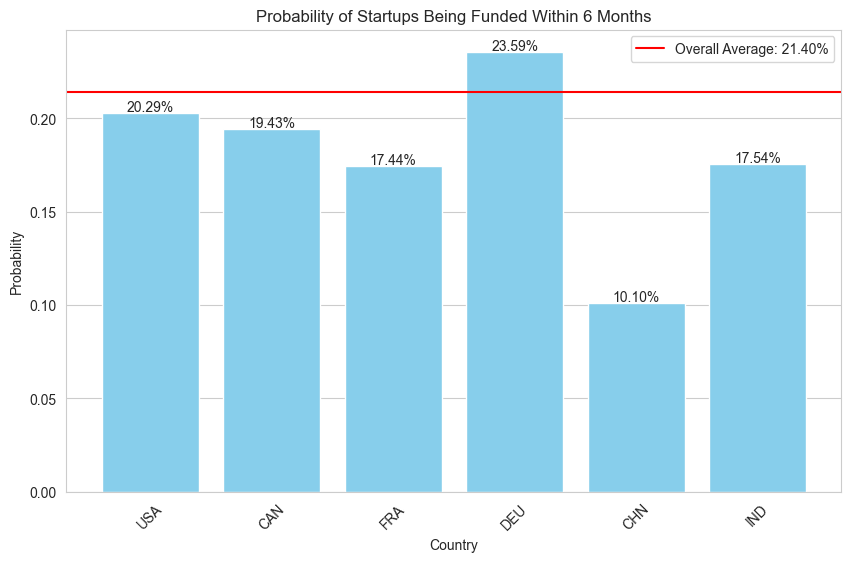

In [501]:
import matplotlib.pyplot as plt

# Data for plotting
countries = ['USA', 'CAN', 'FRA', 'DEU', 'CHN', 'IND']
probabilities = [0.20287773611000293, 0.19428571428571428, 0.17444933920704847, 0.23589269195189638, 0.10103626943005181, 0.17543859649122806]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(countries, probabilities, color='skyblue')

# Adding title and labels
plt.title('Probability of Startups Being Funded Within 6 Months')
plt.axhline(y=probability_overall, color='red', linestyle='-', label=f'Overall Average: {probability_overall:.2%}')
plt.xlabel('Country')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.grid(axis='x')

# Annotating each bar with its probability
for i, prob in enumerate(probabilities):
    plt.text(i, prob + 0.001, f'{prob:.2%}', ha = 'center')


plt.legend()
# Show the plot
plt.show();


### Overall Probability:

Across the entire dataset, a startup has approximately a 21.40% chance of securing funding within the first 6 months of its creation.

### Observations and conclusions from the calculation of the Probabilities of startups being funded within the first 6 months since their creation for each specified country:

* United States (USA): 20.29%
* Canada (CAN): 19.43%
* France (FRA): 17.44%
* Germany (DEU): 23.59%
* China (CHN): 10.10%
* India (IND): 17.54%

These probabilities reflect the varying funding environments in each country. Germany shows the highest probability of startups receiving funding within six months, while China shows the lowest among the countries listed

# <div style="text-align: center;">QUESTION 8</div>

# 8. Advanced Probability Theory: 

Probability for startups of being funded within the first 6 months given the fact that they are based on software domain and then repeat the same sequence of procedures for the countries United States, Canada, France, Germany, China, and India(Use the value ‘Software’ in the appropriate variable of your choice).

In [509]:
from datetime import datetime

# Convert the 'founded_at' and 'first_funding_at' columns to datetime
final_clean_df['founded_at'] = pd.to_datetime(final_clean_df['founded_at'], errors='coerce')
final_clean_df['first_funding_at'] = pd.to_datetime(final_clean_df['first_funding_at'], errors='coerce')

# Calculate 'funding_days' as the difference between 'first_funding_at' and 'founded_at'
final_clean_df['funding_days'] = (final_clean_df['first_funding_at'] - final_clean_df['founded_at']).dt.days

# Apply the mask for startups funded within the first 6 months and belonging to the 'software' category group
mask = (final_clean_df['funding_days'] <= 180) & (final_clean_df['category_group'] == 'Software')
filtered_df = final_clean_df[mask]

# Calculate the probability that a startup belongs to the health care domain given it was funded within the first 6 months
total_startups_funded_in_6_months = final_clean_df[final_clean_df['funding_days'] <= 180].shape[0]
software_startups_funded_in_6_months = filtered_df.shape[0]
probability_software_given_funded_in_6_months = software_startups_funded_in_6_months / total_startups_funded_in_6_months

probability_software_given_funded_in_6_months

0.17425895937477998

In [510]:
# Correct the calculation of probabilities for each specified country
country_probabilities_software = {}

for country in countries:
    # Apply the mask for each country
    country_mask = (final_clean_df['country_code'] == country) & (final_clean_df['funding_days'] <= 180)
    country_software_mask = country_mask & (final_clean_df['category_group'] == 'Software')

    # Calculate the probabilities
    total_startups_funded_in_6_months_country = final_clean_df[country_mask].shape[0]
    software_startups_funded_in_6_months_country = final_clean_df[country_software_mask].shape[0]
    
    # Avoid division by zero
    if total_startups_funded_in_6_months_country > 0:
        probability_software_given_funded_in_6_months_country = software_startups_funded_in_6_months_country / total_startups_funded_in_6_months_country
    else:
        probability_software_given_funded_in_6_months_country = None

    country_probabilities_software[country] = probability_software_given_funded_in_6_months_country

country_probabilities_software


{'USA': 0.18917147351861563,
 'CAN': 0.21657754010695188,
 'FRA': 0.19696969696969696,
 'DEU': 0.16470588235294117,
 'CHN': 0.07692307692307693,
 'IND': 0.1357142857142857}

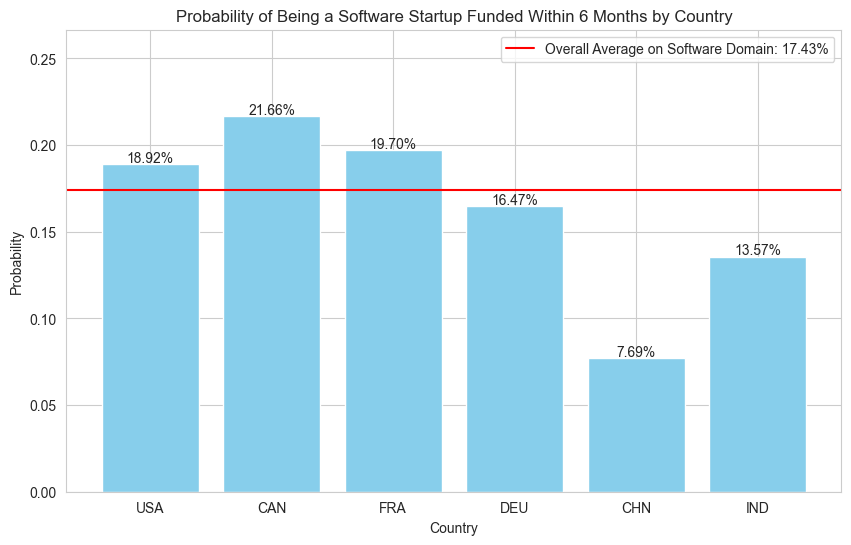

In [511]:
# Creating the bar chart with an added line for the overall average probability

probabilities = country_probabilities_software.values()
countries = country_probabilities_software.keys()


plt.figure(figsize=(10, 6))
plt.bar(countries, probabilities, color='skyblue')
plt.axhline(y=probability_software_given_funded_in_6_months, color='red', linestyle='-', label=f'Overall Average on Software Domain: {probability_software_given_funded_in_6_months:.2%}')
plt.xlabel('Country')
plt.ylabel('Probability')
plt.title('Probability of Being a Software Startup Funded Within 6 Months by Country')
plt.ylim(0, max(probabilities) + 0.05) 
plt.legend()

# Annotating each bar with its probability
for i, prob in enumerate(probabilities):
    plt.text(i, prob + 0.001, f'{prob:.2%}', ha = 'center')

# Show the plot
plt.show();


### Observations and Conclusions:

#### Probabilities that a startup belongs to the software domain, given it was funded within the first six months, for each specified country are:

* United States (USA): Approximately 18.92%
* Canada (CAN): Approximately 21.66%
* France (FRA): Approximately 19.70%
* Germany (DEU): Approximately 16.47%
* China (CHN): Approximately 7.69%
* India (IND): Approximately 13.57%


In summary, while the overall probability for all startups (regardless of country) was approximately 17.43%, we observe varied probabilities across the specified countries. Canada has the highest probability, while China has the lowest in this category

# <div style="text-align: center;">QUESTION 9</div>

# 9. Advanced Probability Theory: 

Find the probability that a startup belongs to health care domain given the fact that it was funded within the first 6 months and then repeat the same sequence of procedures for the countries United States, Canada, France, Germany, China, and India (Use the value ‘Health Care’ in the appropriate variable of your choice). Report your results based on probability found as a whole and then comparison across various countries.

In [458]:
from datetime import datetime

# Convert the 'founded_at' and 'first_funding_at' columns to datetime
final_clean_df['founded_at'] = pd.to_datetime(final_clean_df['founded_at'], errors='coerce')
final_clean_df['first_funding_at'] = pd.to_datetime(final_clean_df['first_funding_at'], errors='coerce')

# Calculate 'funding_days' as the difference between 'first_funding_at' and 'founded_at'
final_clean_df['funding_days'] = (final_clean_df['first_funding_at'] - final_clean_df['founded_at']).dt.days

# Apply the mask for startups funded within the first 6 months and belonging to the 'Health' category group
mask = (final_clean_df['funding_days'] <= 180) & (final_clean_df['category_group'] == 'Health')
filtered_df = final_clean_df[mask]

# Calculate the probability that a startup belongs to the health care domain given it was funded within the first 6 months
total_startups_funded_in_6_months = final_clean_df[final_clean_df['funding_days'] <= 180].shape[0]
health_startups_funded_in_6_months = filtered_df.shape[0]
probability_health_given_funded_in_6_months = health_startups_funded_in_6_months / total_startups_funded_in_6_months

probability_health_given_funded_in_6_months


0.04597620221080054

In [460]:
# List of specified countries
countries = ['USA', 'CAN', 'FRA', 'DEU', 'CHN', 'IND']

# Dictionary to hold probabilities for each country
country_probabilities = {}

for country in countries:
    # Apply the mask for each country
    country_mask = (final_clean_df['country_code'] == country) & (final_clean_df['funding_days'] <= 180)
    country_health_mask = country_mask & (final_clean_df['category_group'] == 'Health')

    # Calculate the probabilities
    total_startups_funded_in_6_months_country = final_clean_df[country_mask].shape[0]
    health_startups_funded_in_6_months_country = final_clean_df[country_health_mask].shape[0]
    
    # Avoid division by zero
    if total_startups_funded_in_6_months_country > 0:
        probability_health_given_funded_in_6_months_country = health_startups_funded_in_6_months_country / total_startups_funded_in_6_months_country
    else:
        probability_health_given_funded_in_6_months_country = None

    country_probabilities_health[country] = probability_health_given_funded_in_6_months_country

country_probabilities_health


{'USA': 0.05374934452018878,
 'CAN': 0.0374331550802139,
 'FRA': 0.03535353535353535,
 'DEU': 0.050980392156862744,
 'CHN': 0.03205128205128205,
 'IND': 0.02857142857142857}

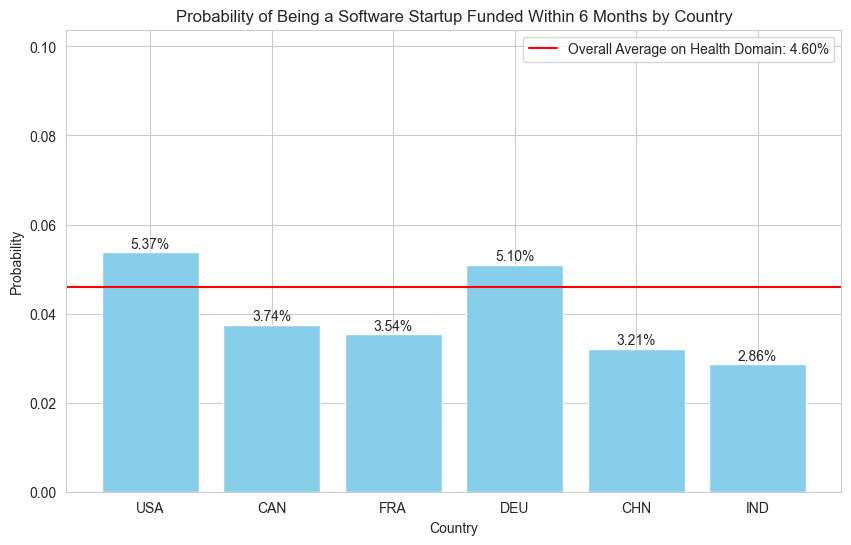

In [507]:
# Creating the bar chart with an added line for the overall average probability

probabilities = country_probabilities_health.values()
countries = country_probabilities_health.keys()


plt.figure(figsize=(10, 6))
plt.bar(countries, probabilities, color='skyblue')
plt.axhline(y=probability_health_given_funded_in_6_months, color='red', linestyle='-', label=f'Overall Average on Health Domain: {probability_health_given_funded_in_6_months:.2%}')
plt.xlabel('Country')
plt.ylabel('Probability')
plt.title('Probability of Being a Software Startup Funded Within 6 Months by Country')
plt.ylim(0, max(probabilities) + 0.05) 
plt.legend()

# Annotating each bar with its probability
for i, prob in enumerate(probabilities):
    plt.text(i, prob + 0.001, f'{prob:.2%}', ha = 'center')

# Show the plot
plt.show();



### Observations and Conclusions:

* The probability that a startup belongs to the health care domain, given it was funded within the first 6 months, is approximately 4.60%.

Here are the probabilities that a startup belongs to the health care domain, given it was funded within the first six months, for each specified country:

United States (USA): Approximately 5.37%
Canada (CAN): Approximately 3.74%
France (FRA): Approximately 3.54%
Germany (DEU): Approximately 5.10%
China (CHN): Approximately 3.21%
India (IND): Approximately 2.86%


#### Probabilities that a startup belongs to the health care domain, given it was funded within the first six months, for each specified country:

* United States (USA): Approximately 5.37%
* Canada (CAN): Approximately 3.74%
* France (FRA): Approximately 3.54%
* Germany (DEU): Approximately 5.10%
* China (CHN): Approximately 3.21%
* India (IND): Approximately 2.86%

In summary, the overall probability for all startups (regardless of country) was approximately 4.60%. Among the specified countries, Germany and the United States have the highest probabilities, while India has the lowest

# <div style="text-align: center;">QUESTION 10</div>

# 10. Advanced Probability Theory: 

- Repeat the analysis in Question 8 but this time perform the operation by first sampling your dataset randomly by getting only 10 data points in the beginning and report your observations as that in Question 8. 

- Next, attempt to repeat the aforesaid procedure for dataset of increasing sample size of 50, 100, 200, 300, 400, 500, 600, and 800. 

- Plot the various probabilities observed against the number of data points you have obtained and write in your own words the observations. 

In [513]:
df = final_clean_df
# Sample 10 random data points
sampled_df = df.sample(n=10, random_state=1)  # fixed random state for reproducibility

sampled_df.head() 

,Unnamed: 0,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_group,funding_days
56338,56342,Tango Analytics,Retail,30000000.0,operating,USA,TX,Dallas,Irving,1,2008-01-01,2015-07-14,2015-07-14,Others,2751
44894,44897,Predictus BioSciences,Biotechnology,500000.0,operating,USA,MA,Boston,West Roxbury,1,2010-01-01,2011-01-12,2011-01-12,Others,376
35409,35412,Merkatic,Communities,2000000.0,operating,FRA,A3,FRA - Other,La Chapelle-saint-mesmin,1,2011-05-03,2014-11-19,2014-11-19,Others,1296
44869,44872,PrecisionLender,Banking,2000000.0,operating,USA,NC,Charlotte,Charlotte,1,2009-01-01,2014-10-10,2014-10-10,Others,2108
31658,31661,Laundrywala,All Students|Clean Technology|Hotels|Service P...,59000.0,operating,IND,36,New Delhi,Noida,1,2014-01-01,2014-12-11,2014-12-11,Others,344


In [515]:
from datetime import datetime

# Convert the 'founded_at' and 'first_funding_at' columns to datetime
sampled_df['founded_at'] = pd.to_datetime(sampled_df['founded_at'], errors='coerce')
sampled_df['first_funding_at'] = pd.to_datetime(sampled_df['first_funding_at'], errors='coerce')

# Calculate 'funding_days' as the difference between 'first_funding_at' and 'founded_at'
sampled_df['funding_days'] = (sampled_df['first_funding_at'] - sampled_df['founded_at']).dt.days

# Apply the mask for startups funded within the first 6 months and belonging to the 'software' category group
mask = (sampled_df['funding_days'] <= 180) & (sampled_df['category_group'] == 'Software')
filtered_df = sampled_df[mask]

# Calculate the probability that a startup belongs to the software domain given it was funded within the first 6 months
total_startups_funded_in_6_months = sampled_df[sampled_df['funding_days'] <= 180].shape[0]
software_startups_funded_in_6_months = filtered_df.shape[0]

probability_software_given_funded_in_6_months = 0
if total_startups_funded_in_6_months > 0:
    probability_software_given_funded_in_6_months = software_startups_funded_in_6_months / total_startups_funded_in_6_months

probability_software_given_funded_in_6_months

total_startups_funded_in_6_months

software_startups_funded_in_6_months


0.0

2

0

### Observations from randomly sampling only 10 elements from the dataset:

The calculation shows that from the 10 randomly sampled data points:
* 2 startups were funded within the first 6 months. 
* However, none of these startups belong to the software domain. 

As a result, the probability of a startup being in the software domain and funded within the first 6 months, based on this sample, is 0%.

This result indicates that in the randomly selected sample of 10 startups, there were either no startups from the specified countries other than the USA that were funded within 6 months, or none of them belonged to the software domain.

This highlights an important aspect of data analysis: the size and representativeness of the sample can significantly impact the results and interpretations. In this case, with only 10 data points, the sample may not provide a complete view of the broader startup funding landscape, particularly for specific domains like software.




In [532]:
sample_sizes = [50, 100, 200, 300, 400, 500, 600, 800]
all_probabilities = {}

# Repeating the analysis for different sample sizes
for size in sample_sizes:
    # Randomly sample data points
    sampled_df = df.sample(n=size, random_state=1)

    # Convert date columns to datetime and calculate 'funding_days'
    sampled_df['founded_at'] = pd.to_datetime(sampled_df['founded_at'], errors='coerce')
    sampled_df['first_funding_at'] = pd.to_datetime(sampled_df['first_funding_at'], errors='coerce')
    sampled_df['funding_days'] = (sampled_df['first_funding_at'] - sampled_df['founded_at']).dt.days

    # Filter for software startups funded within 6 months
    mask = (sampled_df['funding_days'] <= 180) & (sampled_df['category_group'] == 'Software')
    filtered_df = sampled_df[mask]

    # Calculate overall probability for the software domain
    total_startups_funded_in_6_months = sampled_df[sampled_df['funding_days'] <= 180].shape[0]
    software_startups_funded_in_6_months = filtered_df.shape[0]

    probability_software = 0
    if total_startups_funded_in_6_months > 0:
        probability_software = software_startups_funded_in_6_months / total_startups_funded_in_6_months

    # Calculate the probability for each country
    country_probabilities = {}
    for country in countries:
        country_mask = (sampled_df['country_code'] == country) & (sampled_df['funding_days'] <= 180)
        country_software_mask = country_mask & (sampled_df['category_group'] == 'Software')

        total_country = sampled_df[country_mask].shape[0]
        software_country = sampled_df[country_software_mask].shape[0]

        probability_country = None
        if total_country > 0:
            probability_country = software_country / total_country

        country_probabilities[country] = probability_country

    # Store the results
    all_probabilities[size] = {
        "overall": probability_software,
        "countries": country_probabilities
    }

all_probabilities[50] 

all_probabilities[100] 

all_probabilities[200] 

all_probabilities[300] 

all_probabilities[400] 

all_probabilities[500] 

all_probabilities[600] 

all_probabilities[800] 

#all_probabilities[2500] 
# This las one, was done just to test what results we could get 
# by using more samples and we can see that with 2500 samples we can start to visualize more probabilities

{'overall': 0.2857142857142857,
 'countries': {'USA': 0.3333333333333333,
  'CAN': None,
  'FRA': None,
  'DEU': None,
  'CHN': None,
  'IND': None}}

{'overall': 0.3125,
 'countries': {'USA': 0.375,
  'CAN': None,
  'FRA': None,
  'DEU': None,
  'CHN': None,
  'IND': None}}

{'overall': 0.2777777777777778,
 'countries': {'USA': 0.3888888888888889,
  'CAN': 0.0,
  'FRA': None,
  'DEU': 0.0,
  'CHN': None,
  'IND': 0.0}}

{'overall': 0.2222222222222222,
 'countries': {'USA': 0.2777777777777778,
  'CAN': 0.0,
  'FRA': None,
  'DEU': 0.0,
  'CHN': None,
  'IND': 0.0}}

{'overall': 0.23076923076923078,
 'countries': {'USA': 0.28888888888888886,
  'CAN': 0.0,
  'FRA': None,
  'DEU': 0.0,
  'CHN': 0.0,
  'IND': 0.0}}

{'overall': 0.18446601941747573,
 'countries': {'USA': 0.22580645161290322,
  'CAN': 0.0,
  'FRA': None,
  'DEU': 0.0,
  'CHN': 0.0,
  'IND': 0.0}}

{'overall': 0.17557251908396945,
 'countries': {'USA': 0.21333333333333335,
  'CAN': 0.5,
  'FRA': None,
  'DEU': 0.0,
  'CHN': 0.0,
  'IND': 0.0}}

{'overall': 0.16167664670658682,
 'countries': {'USA': 0.20430107526881722,
  'CAN': 0.3333333333333333,
  'FRA': None,
  'DEU': 0.0,
  'CHN': 0.0,
  'IND': 0.16666666666666666}}

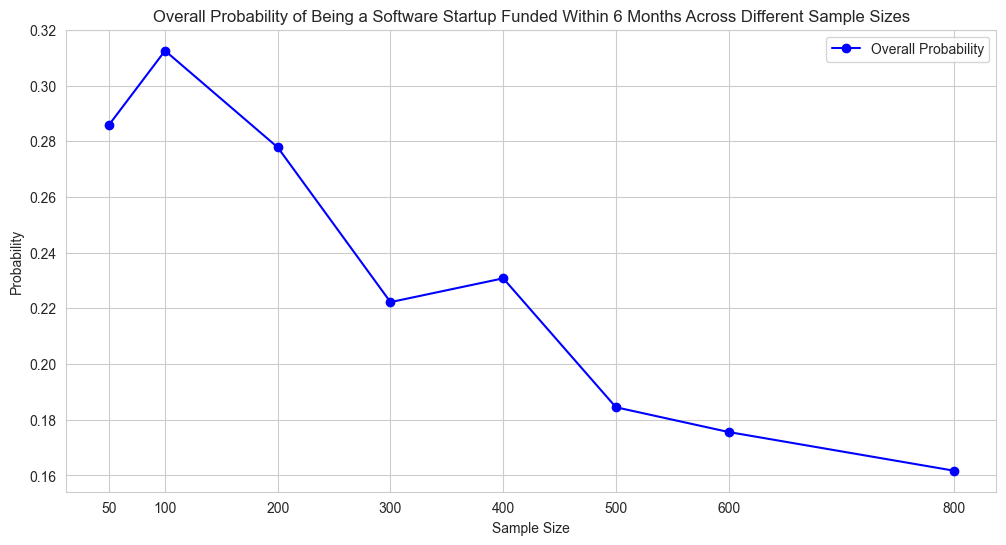

In [534]:
# Preparing data for visualization
overall_probabilities = [all_probabilities[size]['overall'] for size in sample_sizes]

# Creating a plot for overall probabilities across different sample sizes
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, overall_probabilities, marker='o', color='b', label='Overall Probability')
plt.xlabel('Sample Size')
plt.ylabel('Probability')
plt.title('Overall Probability of Being a Software Startup Funded Within 6 Months Across Different Sample Sizes')
plt.xticks(sample_sizes)
plt.grid(True)
plt.legend()
plt.show(); 


### This visualization underscores the importance of considering sample size in data analysis, as larger samples tend to provide a more accurate and representative picture of the underlying population.

## Observations: 

### Considering the probability of a startup being in the software domain and funded within the first 6 months using samples of different sizes

#### For a sample size of 50:

* Overall probability for the software domain: 28.57%
* For the United States (USA): 33.33%
* For Canada (CAN), France (FRA), Germany (DEU), China (CHN), and India (IND), the probabilities are not defined (None), maybe because of the absence of relevant data points in the sample.

#### For a sample size of 100:

* Overall probability for the software domain: 31.25%
* USA: 37.5%
* No data available (None) for Canada, France, Germany, China, and India.


#### For a sample size of 200:

* Overall probability for the software domain: 27.78%
* USA: 38.89%
* Canada: 0.0%
* Germany 0.0%
* India: 0.0%
* No data available for France AND China.

#### For a sample size of 300:

* Overall probability for the software domain: 22.22%
* USA: 27.78%
* Canada: 0.0%
* Germany and China: 0.0%
* India: 0.0%
* China: 0.0%
* No data available for France.


#### For a sample size of 400:

* Overall probability for the software domain: 23.08%
* USA: 28.89%
* Canada: 0.0%
* Germany and China: 0.0%
* India: 16.67%
* No data available for France.


#### For a sample size of 500:

* Overall probability for the software domain: 18.45%
* USA: 22.58%
* Canada: 0.0%
* Germany and China: 0.0%
* India: 16.67%
* No data available for France.


#### For a sample size of 600:

* Overall probability for the software domain: 17.56%
* USA: 21.33%
* Canada: 50.0%
* Germany and China: 0.0%
* India: 0.0%
* No data available for France.


#### For a sample size of 800:

* Overall probability for the software domain: 16.17%
* USA: 20.43%
* Canada: 33.33%
* Germany and China: 0.0%
* India: 16.67%
* No data available for France.



## Plot with 

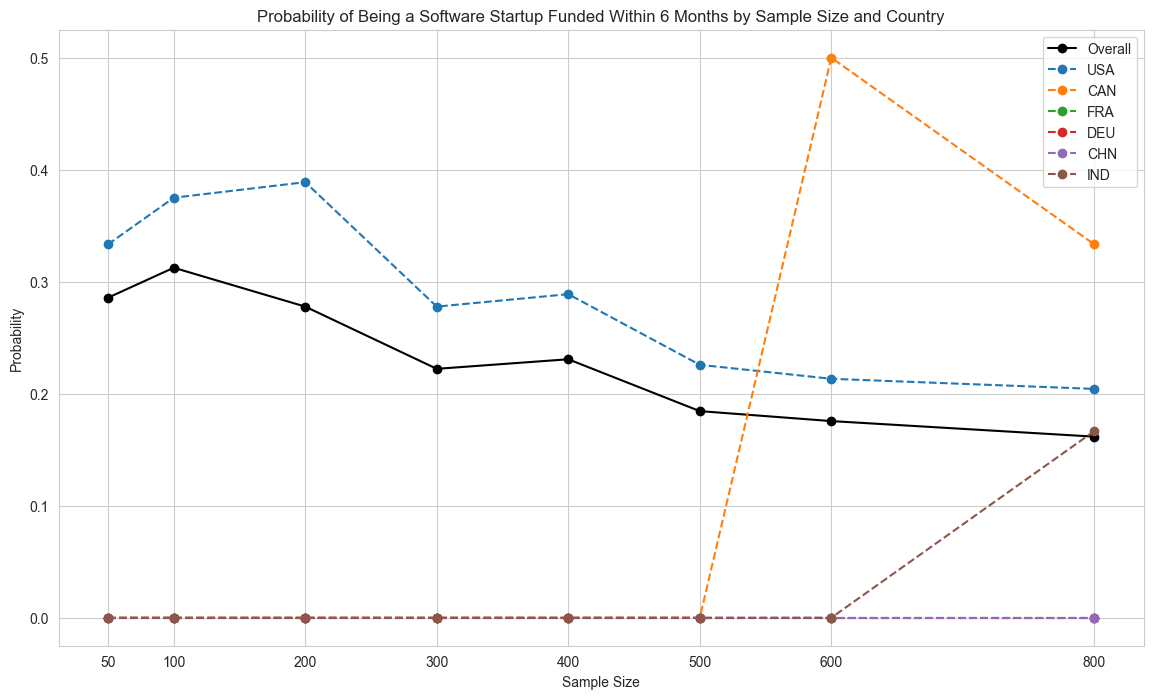

In [537]:
country_prob_data = {country: [] for country in countries}

for size in sample_sizes:
    for country in countries:
        prob = all_probabilities[size]['countries'][country]
        # If no data available, we assign 0 for visualization purposes
        country_prob_data[country].append(prob if prob is not None else 0)

# Creating the plot
plt.figure(figsize=(14, 8))

# Plotting overall probabilities
plt.plot(sample_sizes, overall_probabilities, marker='o', linestyle='-', color='black', label='Overall')

# Plotting each country's probabilities
for country, probs in country_prob_data.items():
    plt.plot(sample_sizes, probs, marker='o', linestyle='--', label=country)

plt.xlabel('Sample Size')
plt.ylabel('Probability')
plt.title('Probability of Being a Software Startup Funded Within 6 Months by Sample Size and Country')
plt.xticks(sample_sizes)
plt.grid(True)
plt.legend()
plt.show();


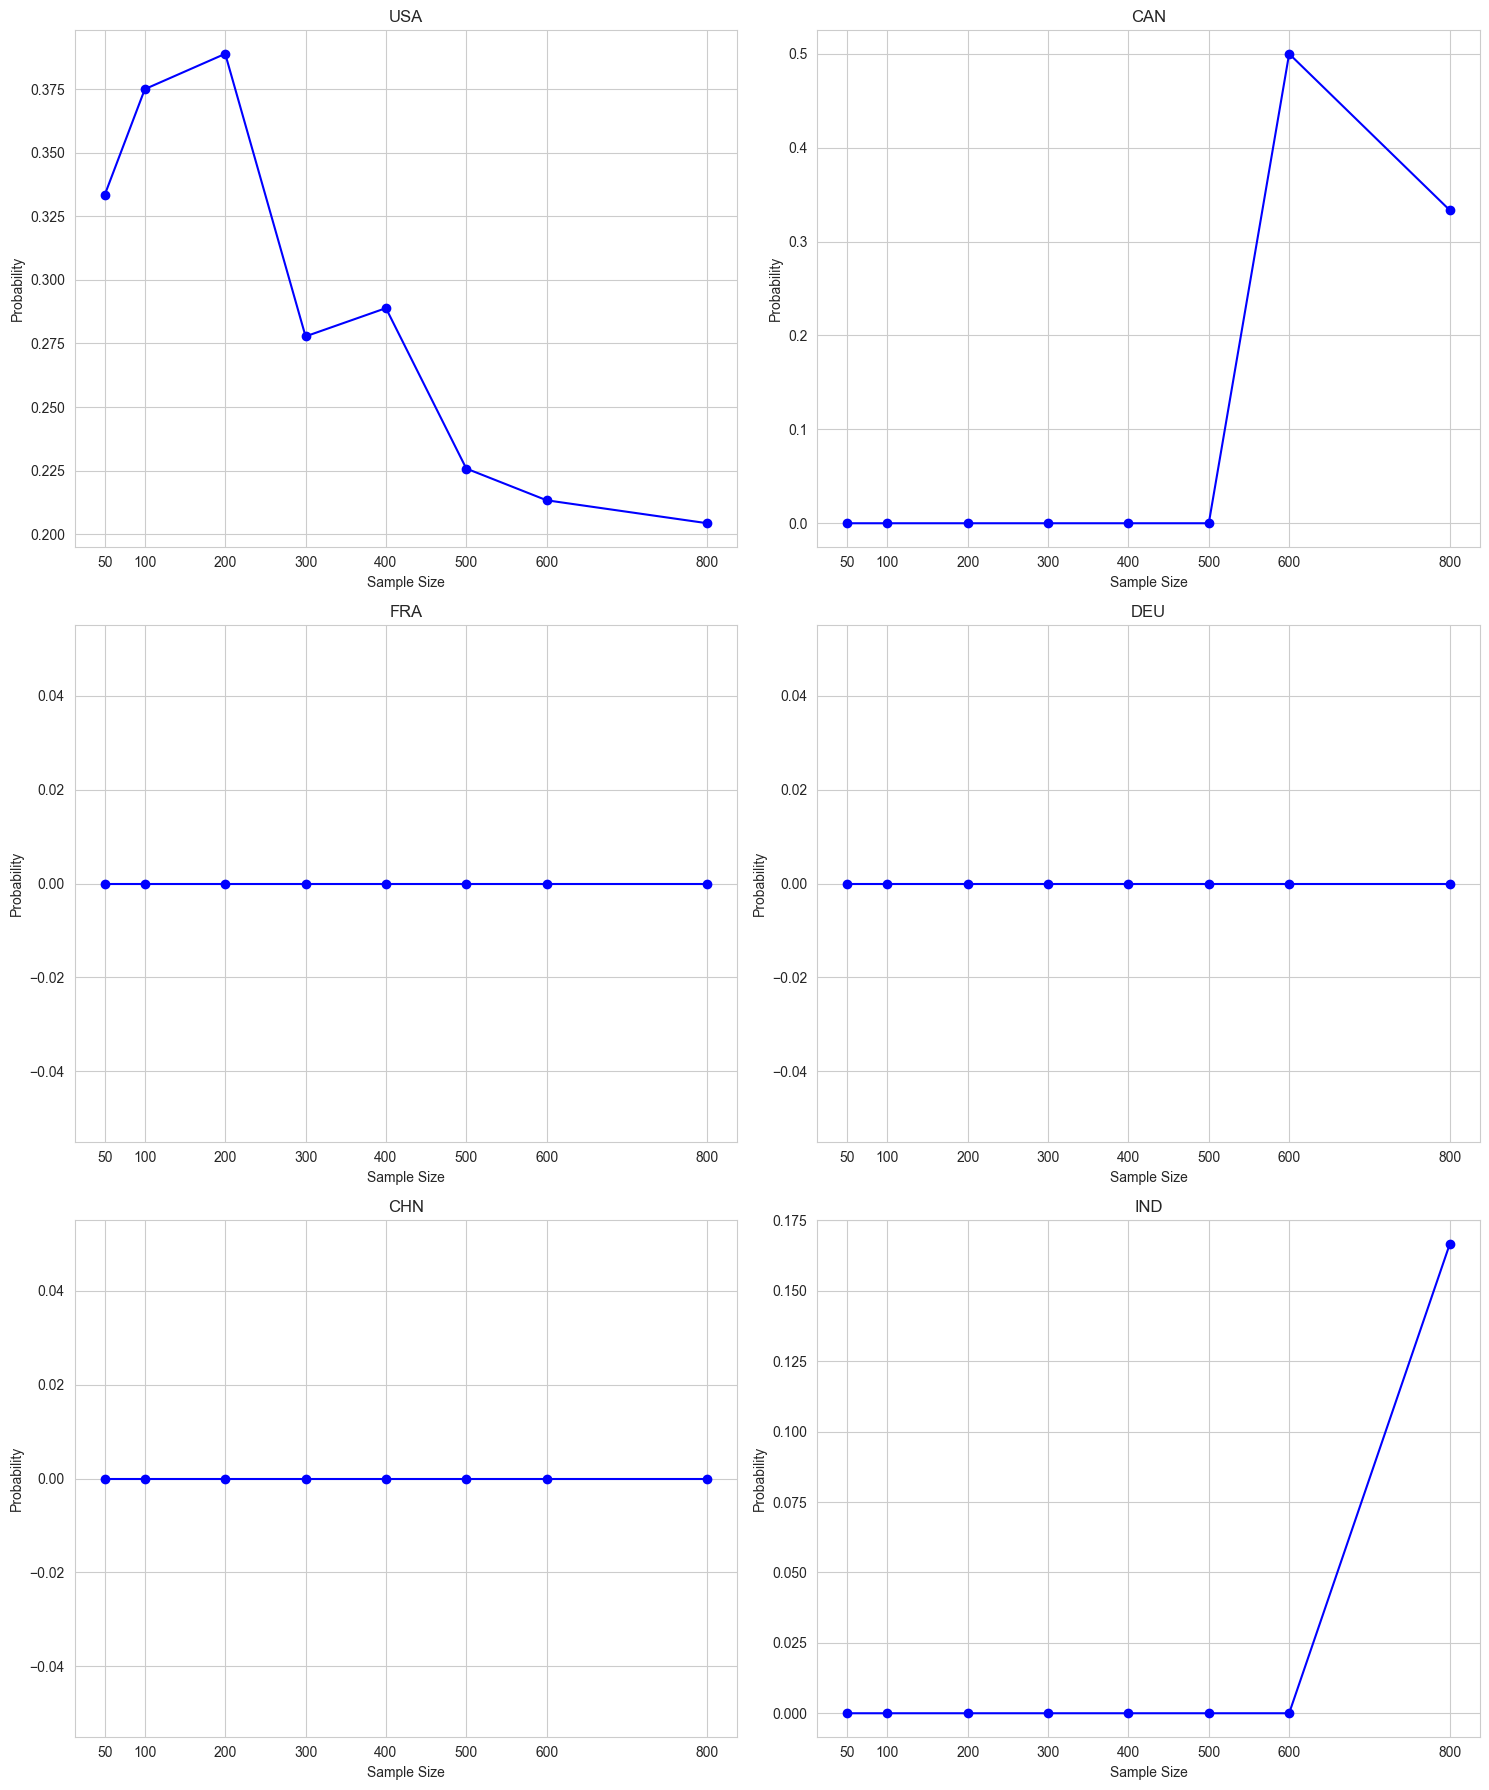

In [544]:
# Setting up the figure and axes for a 3x2 grid
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# Flattening the axis array for easy iteration
axs = axs.flatten()

# Plotting for each country in the grid
for i, country in enumerate(countries):
    axs[i].plot(sample_sizes, country_prob_data[country], marker='o', linestyle='-', color='b')
    axs[i].set_title(f'{country}')
    axs[i].set_xlabel('Sample Size')
    axs[i].set_ylabel('Probability')
    axs[i].set_xticks(sample_sizes)
    axs[i].grid(True)

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show();


## Conclusions: 

* Based on our analysis, it appears that the likelihood of a startup operating in the software sector and securing funding within the initial 6 months is impacted by two key factors: the size of our sample and the geographical location of these startups.

* These findings emphasize the importance of having a dataset that is both comprehensive and representative of a wide range of startup scenarios. This is particularly crucial when examining countries for which data is currently unavailable.

* To gain a deeper understanding of the factors responsible for the fluctuations in probabilities and the lack of data from specific countries, further investigation is necessary. This will help us refine our analysis and provide more accurate insights into the dynamics of startup funding in the software industry.

# <div style="text-align: center;">THANK YOU</div>
# <div style="text-align: center;">FOR READING </div>